<a href="https://colab.research.google.com/github/abigailhtp/Blaze-Praktikum-ML/blob/main/Praktikum_5_Miriam_Stefani_24060122130051.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h4><b> 1. Lakukan agglomerative clustering untuk dataset random yang tersedia di atas dengan single linkage dan average linkage! Jelaskan perbedaannya! </b></h4>

> Library yang digunakan dalam clustering

In [3]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold,datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline

> Generate random data beserta plottingnya

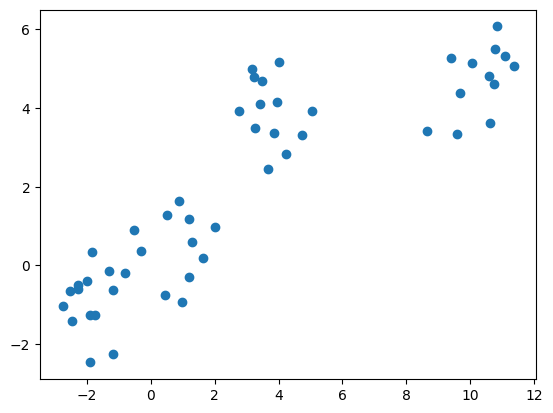

In [ ]:
X1,y1=make_blobs(n_samples=50,centers=[[4,4],[-2,-1],[10,5],[1,1]],cluster_std=0.9)
plt.scatter(X1[:,0],X1[:,1],marker='o')

<h5> <b> a. Single Linkage </h5> </b>

In [ ]:
agglom=AgglomerativeClustering(n_clusters=4,linkage='single')
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='single', n_clusters=4)

> Membuat visualisasi agglomerative clustering single linkage

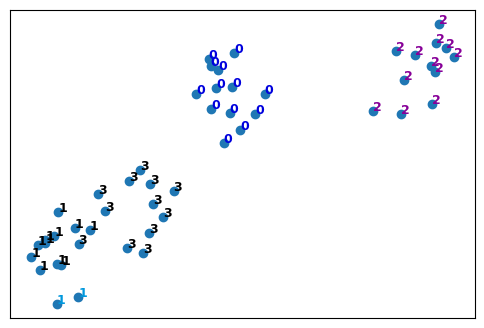

In [ ]:
#create a figure of size 6 inches by 4 inches
plt.figure(figsize=(6,4))

#create a minimum and maximum range of X1
x_min,x_max=np.min(X1,axis=0),np.max(X1,axis=0)

#average distance for X1
X1=(X1-x_min)/(x_max-x_min)

for i in range (X1.shape[0]):
  plt.text(X1[i,0],X1[i,1],str(y1[i]),
           color=plt.cm.nipy_spectral(agglom.labels_[i]/10.),
           fontdict={'weight':'bold','size':9})

plt.xticks([])
plt.yticks([])

plt.scatter(X1[:,0],X1[:,1],marker='o')
plt.show()

> menghitung matriks jarak antar data dalam kumpulan data X1

In [ ]:
dist_matrix=distance_matrix(X1,X1)
print(dist_matrix)

[[0.         0.48075804 0.170953   ... 0.21364072 0.41335434 0.48016098]
 [0.48075804 0.         0.57072494 ... 0.50824566 0.07903446 0.10265665]
 [0.170953   0.57072494 0.         ... 0.1035812  0.49402663 0.59630581]
 ...
 [0.21364072 0.50824566 0.1035812  ... 0.         0.42945958 0.54917371]
 [0.41335434 0.07903446 0.49402663 ... 0.42945958 0.         0.15160619]
 [0.48016098 0.10265665 0.59630581 ... 0.54917371 0.15160619 0.        ]]


> hierarchy linkage beserta dendogram dari single linkage

In [ ]:
A = hierarchy.linkage(dist_matrix,'single')

<ipython-input-14-73e3a28334fc>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  A = hierarchy.linkage(dist_matrix,'single')


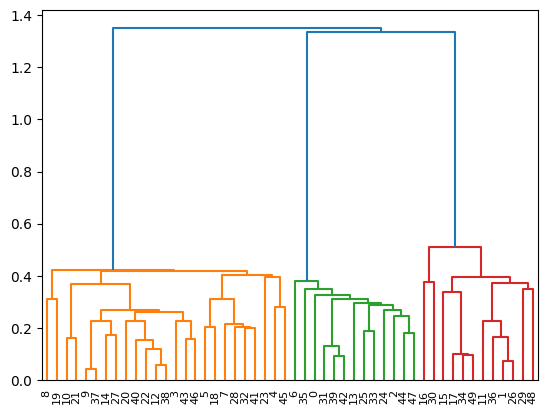

In [ ]:
dendro=hierarchy.dendrogram(A)

<h5> <b> b. Average Linkage </h5> </b>

In [ ]:
agglom1=AgglomerativeClustering(n_clusters=4,linkage='average')
agglom1.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

> Membuat visualisasi agglomerative clustering average linkage. Terbentuk 4 cluster

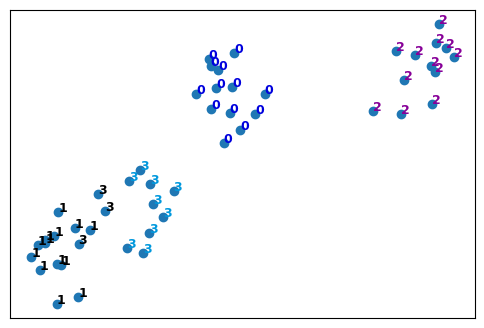

In [ ]:
#create a figure of size 6 inches by 4 inches
plt.figure(figsize=(6,4))

#create a minimum and maximum range of X1
x_min,x_max=np.min(X1,axis=0),np.max(X1,axis=0)

#average distance for X1
X1=(X1-x_min)/(x_max-x_min)

for i in range (X1.shape[0]):
  plt.text(X1[i,0],X1[i,1],str(y1[i]),
           color=plt.cm.nipy_spectral(agglom1.labels_[i]/10.),
           fontdict={'weight':'bold','size':9})

plt.xticks([])
plt.yticks([])

plt.scatter(X1[:,0],X1[:,1],marker='o')
plt.show()

> Menghitung matriks jarak antardata di X1

In [ ]:
dist_matrix=distance_matrix(X1,X1)
print(dist_matrix)

[[0.         0.48075804 0.170953   ... 0.21364072 0.41335434 0.48016098]
 [0.48075804 0.         0.57072494 ... 0.50824566 0.07903446 0.10265665]
 [0.170953   0.57072494 0.         ... 0.1035812  0.49402663 0.59630581]
 ...
 [0.21364072 0.50824566 0.1035812  ... 0.         0.42945958 0.54917371]
 [0.41335434 0.07903446 0.49402663 ... 0.42945958 0.         0.15160619]
 [0.48016098 0.10265665 0.59630581 ... 0.54917371 0.15160619 0.        ]]


> hierarchy linkage beserta dendogram dari average linkage

In [ ]:
B = hierarchy.linkage(dist_matrix,'average')

<ipython-input-21-fb4650aef52d>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  B = hierarchy.linkage(dist_matrix,'average')


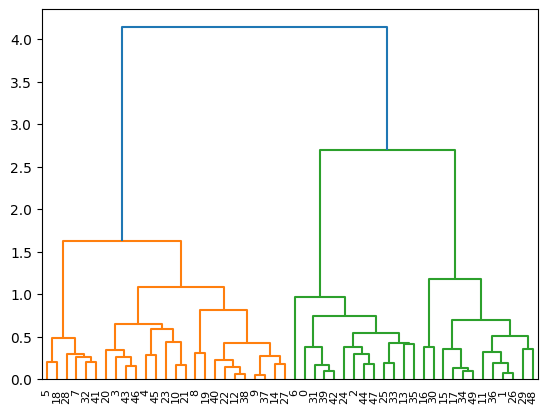

In [ ]:
dendro1=hierarchy.dendrogram(B)

> Perbedaan single linkage dan average linkage dari random data ini yaitu pada single linkage terdapat 3 cluster yang dapat dibentuk, sedangkan pada average linkage terdapat 2 cluster yang dapat dibentuk

<br><h4><b> 2.Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage dan average linkage untuk dataset cars_clustering! Jelaskan perbedaannya!</h4></b>

> Membaca file data dan cleaning terhadap data

In [ ]:
filename='cars_clus.csv'
pdf=pd.read_csv(filename)
print('Shape of dataset: ',pdf.shape)
pdf.head(5)

Shape of dataset:  (159, 16)


manufact    model   sales  resale type   price engine_s horsepow wheelbas  \
0    Acura  Integra  16.919   16.36    0    21.5      1.8      140    101.2   
1    Acura       TL  39.384  19.875    0    28.4      3.2      225    108.1   
2    Acura       CL  14.114  18.225    0  $null$      3.2      225    106.9   
3    Acura       RL   8.588  29.725    0      42      3.5      210    114.6   
4     Audi       A4  20.397  22.255    0   23.99      1.8      150    102.6   

  width length curb_wgt fuel_cap mpg lnsales  partition  
0  67.3  172.4    2.639     13.2  28   2.828          0  
1  70.3  192.9    3.517     17.2  25   3.673          0  
2  70.6    192     3.47     17.2  26   2.647          0  
3  71.4  196.6     3.85       18  22    2.15          0  
4  68.2    178    2.998     16.4  27   3.015          0

> Karena ada nilai data yang null, dilakukan data cleaning untuk membersihkan data

In [ ]:
#Data cleaning
print("Shape of dataset before cleaning:", pdf.size)
pdf[['sales','resale','type','price','engine_s',
    'horsepow','wheelbas','width','length','curb_wgt','fuel_cap',
     'mpg','lnsales']] = pdf[['sales','resale','type','price','engine_s','horsepow',
                              'wheelbas','width','length','curb_wgt','fuel_cap','mpg','lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print("Shape of dataset after cleaning:", pdf.size)
pdf.head(5)

Shape of dataset before cleaning: 2544
Shape of dataset after cleaning: 1872


manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828          0  
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673          0  
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150          0  
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015          0  
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933          0

> Seleksi fitur dan normalisasi

In [ ]:
#Feature selection
featureset=pdf[['engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg']]

In [ ]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
x=featureset.values
mms=MinMaxScaler()
feature_mtx=mms.fit_transform(x)
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

> Agglomerative menggunakan <b>scipy</b>

In [ ]:
#Clustering with scipy
import numpy as np
import scipy

leng=feature_mtx.shape[0]
D=np.zeros([leng,leng])
for i in range(leng):
  for j in range(leng):
    D[i,j]=scipy.spatial.distance.euclidean(feature_mtx[i],feature_mtx[j])

> Single linkage menggunakan scipy

In [ ]:
#Single linkage
import pylab
import scipy.cluster.hierarchy
E=hierarchy.linkage(D,'single')

<ipython-input-29-0ca29999a665>:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  E=hierarchy.linkage(D,'single')


>> menggunakan cutline

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d=3
clusters=fcluster(E,max_d,criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

>> menggunakan jumlah cluster secara langsung

In [ ]:
from scipy.cluster.hierarchy import fcluster
k=5
clusters=fcluster(E,k,criterion='maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2], dtype=int32)

> <b>Plotting Dendrogram Single Linkage</b>

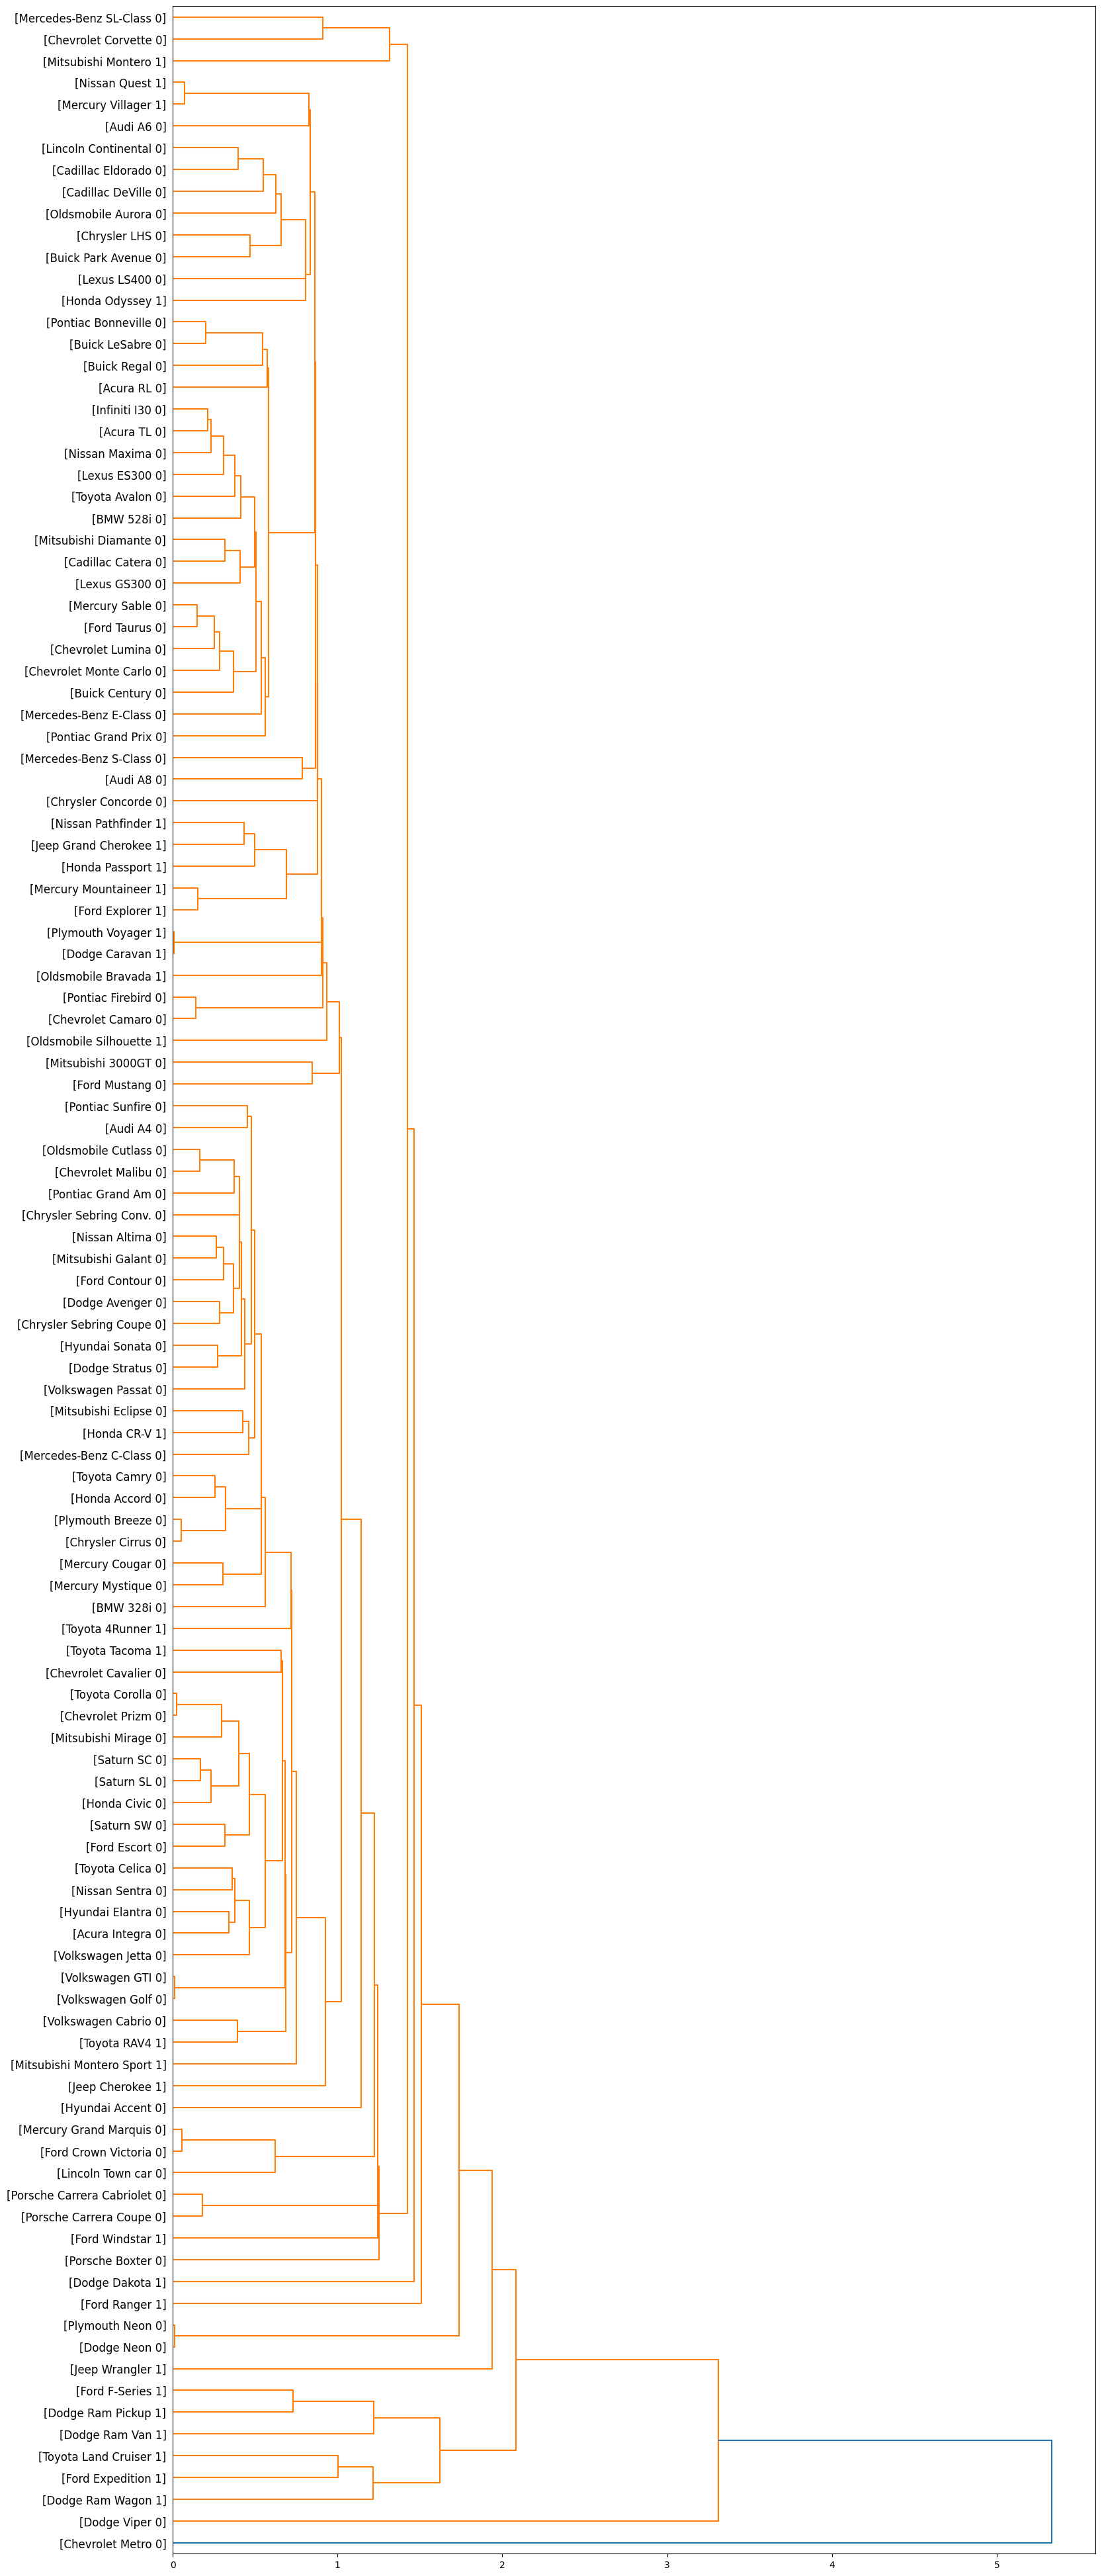

In [ ]:
fig=pylab.figure(figsize=(18,50))
def llf(id):
  return '[%s %s %s]' %(pdf['manufact'][id],pdf['model'][id],int(float(pdf['type'][id])))
dendro=hierarchy.dendrogram(E,leaf_label_func=llf,leaf_rotation=0,leaf_font_size=12,orientation='right')

>> Single linkage menggunakan <b>scikit-learn</b>

In [ ]:
#clustering dengan scikit-learn
dist_matrix=distance_matrix(feature_mtx,feature_mtx)
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [ ]:
agglom=AgglomerativeClustering(n_clusters=6,linkage='single')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

In [ ]:
#cluster dari setiap baris
pdf['cluster_'] = agglom.labels_
pdf.head()

manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  \
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828          0   
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673          0   
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150          0   
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015          0   
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933          0   

   cluster_  
0         0  
1         0  
2         0  
3         0  
4         0

<ipython-input-42-0f0cccf1e6c4>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow,subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

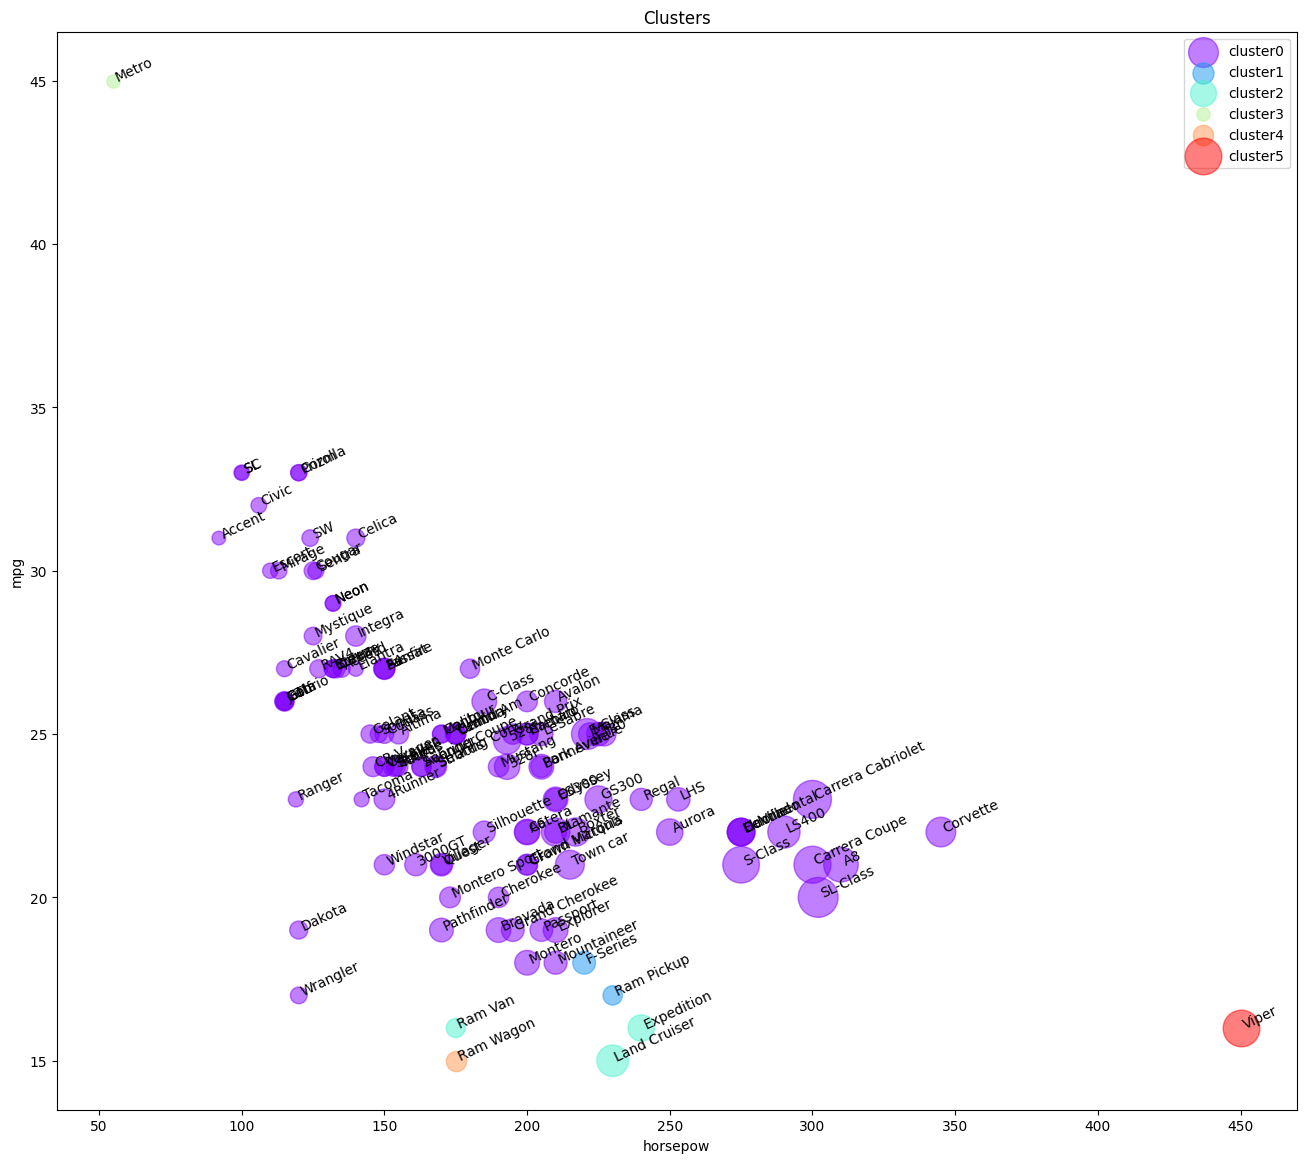

In [ ]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors,cluster_labels):
  subset=pdf[pdf.cluster_==label]
  for i in subset.index:
      plt.text(subset.horsepow[i],subset.mpg[i],str(subset['model'][i]),rotation=25)
  plt.scatter(subset.horsepow,subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

> mengelompokkan data berdasarkan tipe dan cluster

In [ ]:
pdf.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0     86
          1.0     23
1         1.0      2
2         1.0      3
3         0.0      1
4         1.0      1
5         0.0      1
Name: cluster_, dtype: int64

> menentukan mean horsepow, engine_s, mpg, price dari data di setiap cluster dan tipe

In [ ]:
# karakteristik masing-masing cluster
agg_cars = pdf.groupby(['cluster_','type'])[['horsepow','engine_s','mpg','price']].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   181.197674  2.902326  25.358140  26.286779
         1.0   167.478261  3.095652  21.000000  22.811261
1        1.0   225.000000  4.900000  17.500000  23.197500
2        1.0   215.000000  4.400000  15.666667  35.479333
3        0.0    55.000000  1.000000  45.000000   9.235000
4        1.0   175.000000  3.900000  15.000000  21.315000
5        0.0   450.000000  8.000000  16.000000  69.725000

>> plotting dendogram

<ipython-input-48-5431372999d5>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5,subset.loc[i][2],'type:'+str(int(i))+', price='+str(int(subset.loc[i][3]))+'k')
<ipython-input-48-5431372999d5>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow,subset.mpg,s=subset.price*20,c=color,label='cluster'+str(label))


Text(0, 0.5, 'mpg')

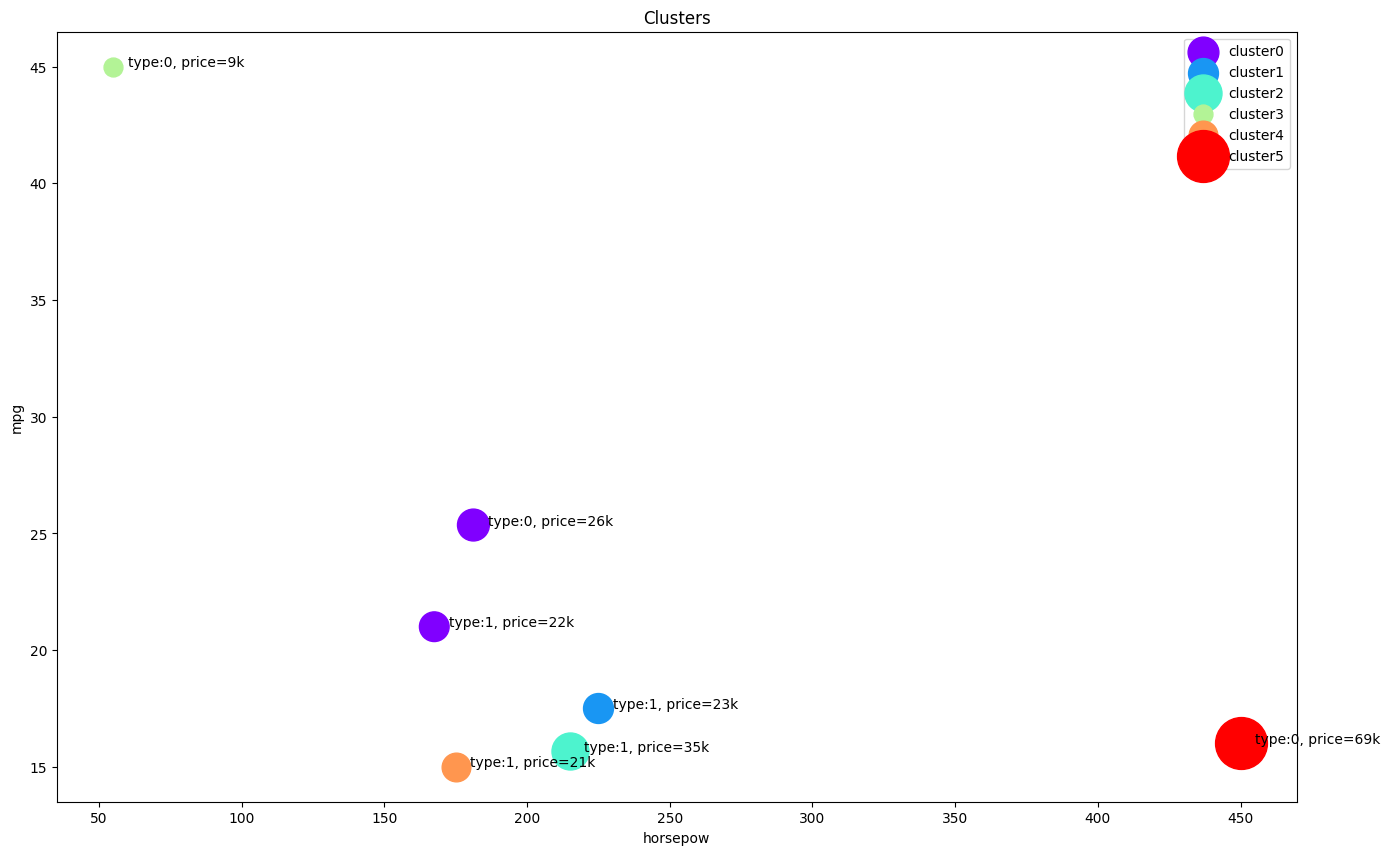

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip (colors, cluster_labels):
  subset= agg_cars.loc[(label,),]
  for i in subset.index:
    plt.text(subset.loc[i][0]+5,subset.loc[i][2],'type:'+str(int(i))+', price='+str(int(subset.loc[i][3]))+'k')
  plt.scatter(subset.horsepow,subset.mpg,s=subset.price*20,c=color,label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

> <b>Average Linkage</b>


>> menggunakan <b>scipy</b>

In [ ]:
#Average linkage
import pylab
import scipy.cluster.hierarchy
G=hierarchy.linkage(D,'average')

<ipython-input-49-8bae5acb45cd>:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  G=hierarchy.linkage(D,'average')


In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d=3
clusters=fcluster(G,max_d,criterion='distance')
clusters

array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

In [ ]:
from scipy.cluster.hierarchy import fcluster
k=5
clusters=fcluster(G,k,criterion='maxclust')
clusters

array([2, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 2,
       5, 4, 4, 4, 4, 4, 2, 4, 4, 1, 1, 1, 1, 3, 4, 2, 4, 4, 4, 3, 4, 3,
       1, 4, 1, 2, 4, 4, 4, 3, 2, 2, 4, 4, 2, 4, 4, 4, 4, 3, 3, 3, 2, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       4, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2,
       4, 1, 2, 4, 4, 2, 2], dtype=int32)

>>>plotting dendogram

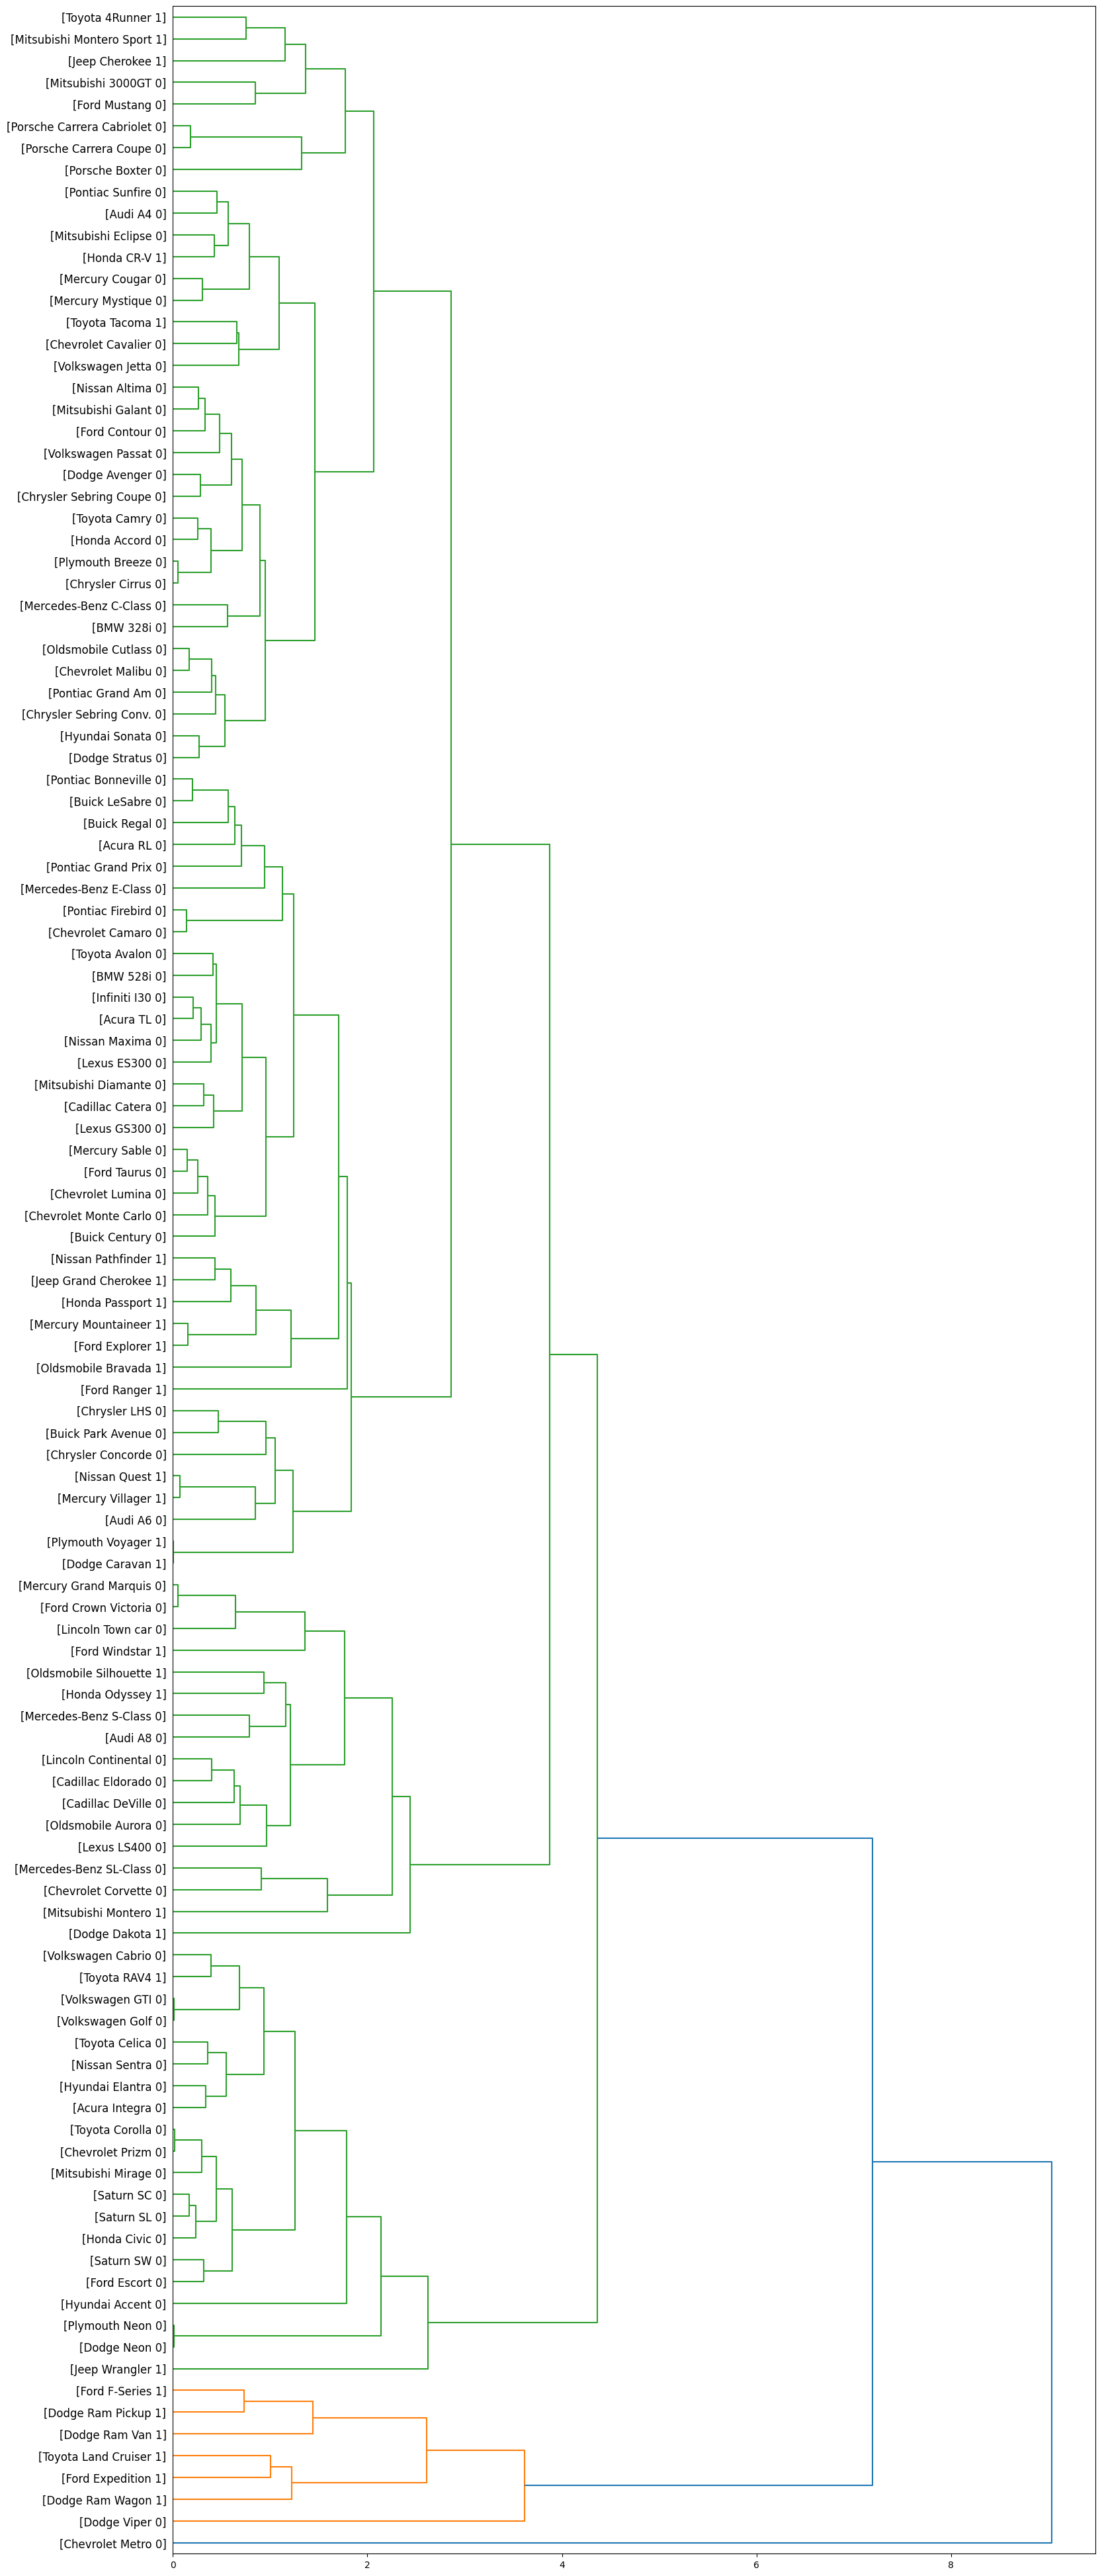

In [ ]:
fig=pylab.figure(figsize=(18,50))
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id],pdf['model'][id],int(float(pdf['type'][id])))
dendro=hierarchy.dendrogram(G,leaf_label_func=llf,leaf_rotation=0, leaf_font_size=12, orientation='right')

>> clustering dengan <b>scikit-learn</b>

In [ ]:
dist_matrix=distance_matrix(feature_mtx,feature_mtx )
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


>>> melakukan clustering dengan average linkage dengan jumlah cluster sebanyak 6

In [ ]:
agglom=AgglomerativeClustering(n_clusters=6, linkage = 'average')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 1, 0,
       3, 0, 0, 4, 0, 4, 0, 0, 0, 1, 5, 2, 2, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       2, 4, 5, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 4, 4, 4, 0, 4,
       4, 4, 0, 0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

In [ ]:
pdf['cluster_']=agglom.labels_
pdf.head()

manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  \
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828          0   
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673          0   
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150          0   
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015          0   
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933          0   

   cluster_  
0         0  
1         4  
2         4  
3         0  
4         4

<ipython-input-57-0f0cccf1e6c4>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow,subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

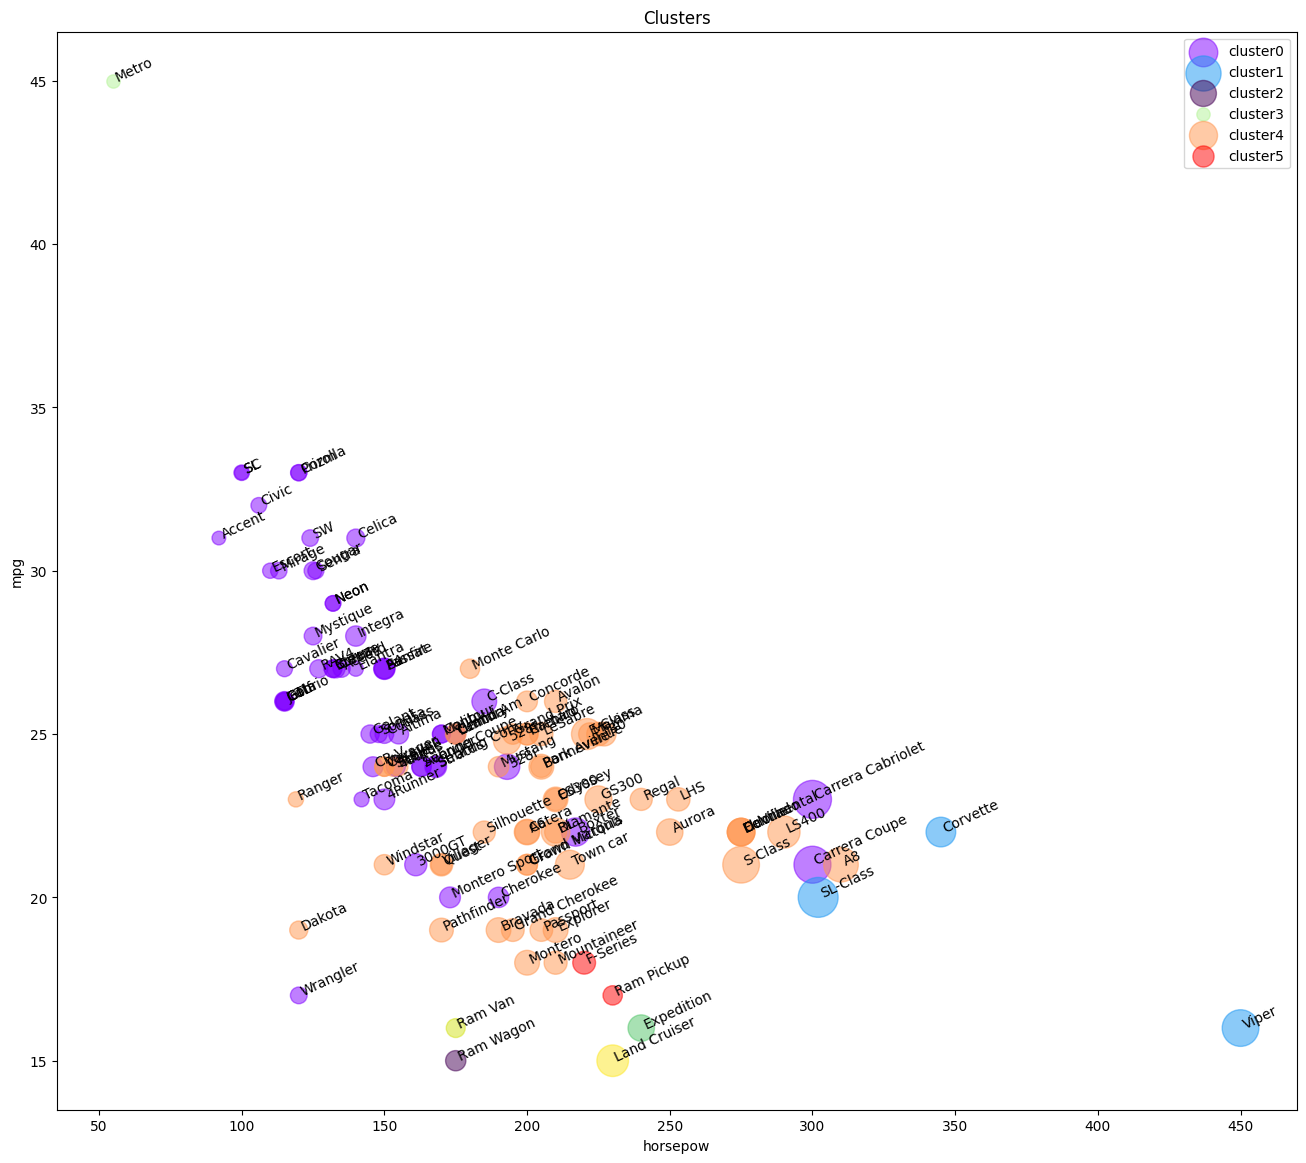

In [ ]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors,cluster_labels):
  subset=pdf[pdf.cluster_==label]
  for i in subset.index:
      plt.text(subset.horsepow[i],subset.mpg[i],str(subset['model'][i]),rotation=25)
  plt.scatter(subset.horsepow,subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

>>> menghitung jumlah kasus di setiap kelompok

In [ ]:
pdf.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0     47
          1.0      7
1         0.0      3
2         1.0      4
3         0.0      1
4         0.0     37
          1.0     16
5         1.0      2
Name: cluster_, dtype: int64

cluster_  type
0         0.0     47
          1.0      7
1         0.0      3
2         1.0      4
3         0.0      1
4         0.0     37
          1.0     16
5         1.0      2
Name: cluster_, dtype: int64

>>> karakteristik masing-masing cluster

In [ ]:
agg_cars=pdf.groupby(['cluster_','type'])[['horsepow','engine_s', 'mpg','price']].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   149.714286  2.657143  22.000000  18.551571
1        0.0   365.666667  6.233333  19.333333  66.010000
2        1.0   205.000000  4.275000  15.500000  31.938250
3        0.0    55.000000  1.000000  45.000000   9.235000
4        0.0   217.540541  3.602703  23.481081  31.837027
         1.0   175.250000  3.287500  20.562500  24.674875
5        1.0   225.000000  4.900000  17.500000  23.197500

>>> plotting dendrogram

<ipython-input-62-5431372999d5>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5,subset.loc[i][2],'type:'+str(int(i))+', price='+str(int(subset.loc[i][3]))+'k')
<ipython-input-62-5431372999d5>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow,subset.mpg,s=subset.price*20,c=color,label='cluster'+str(label))


Text(0, 0.5, 'mpg')

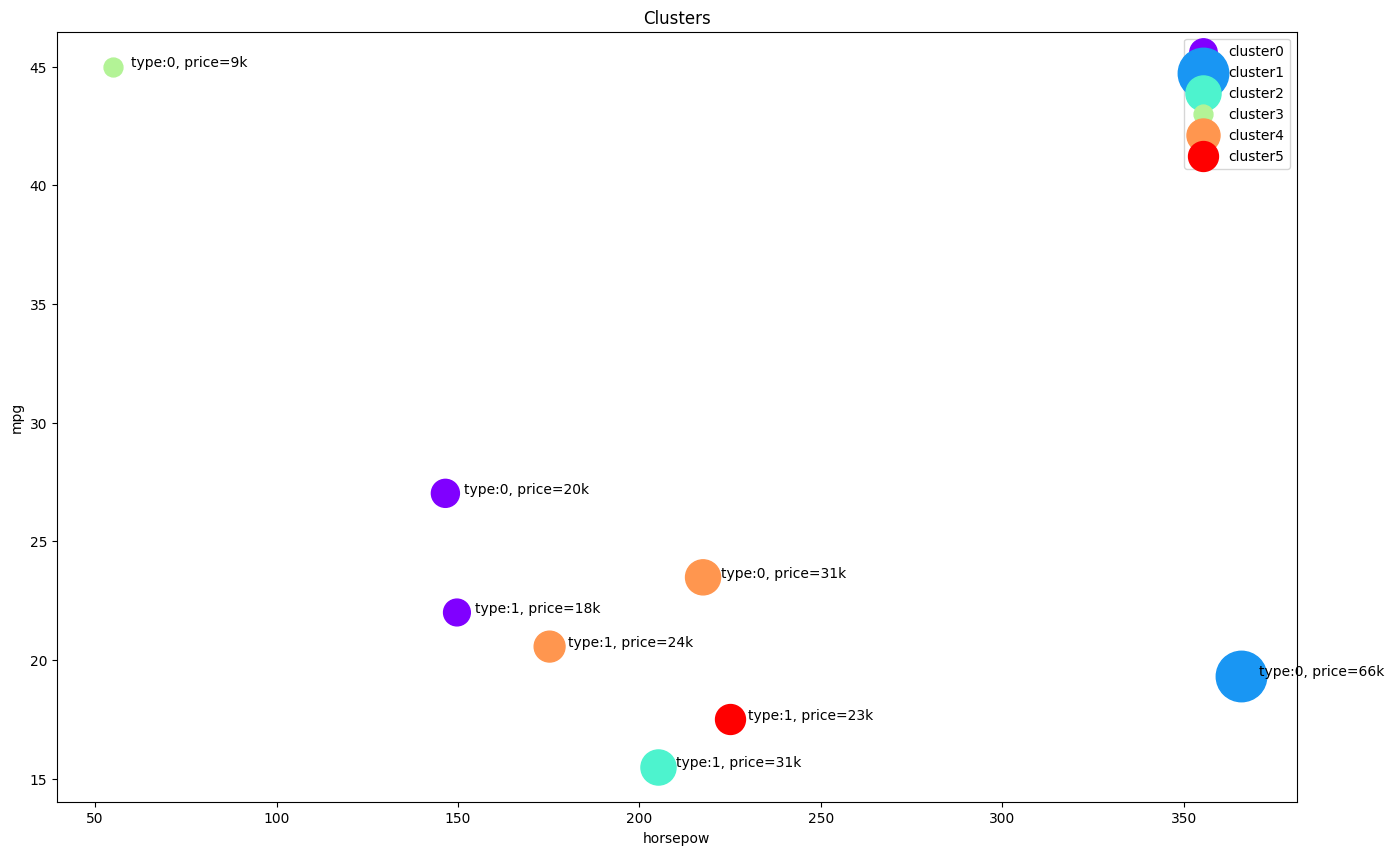

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip (colors, cluster_labels):
  subset= agg_cars.loc[(label,),]
  for i in subset.index:
    plt.text(subset.loc[i][0]+5,subset.loc[i][2],'type:'+str(int(i))+', price='+str(int(subset.loc[i][3]))+'k')
  plt.scatter(subset.horsepow,subset.mpg,s=subset.price*20,c=color,label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Perbedaan clustering single linkage dan average linkage dengan menggunakan scipy dan scikit learn yaitu clustering dengan menggunakan scipy tidak memberikan detail pengelompokan cluster dengan menggunakan fitur, sementara scikit learn menggunakan detail pengelompokan cluster berdasarkan nilai rata2 fitur di setiap cluster.<br>

Output dari scipy yaitu matriks linkage atau dendrogram, sedangkan output dari scikit learn yaitu label cluster langsung. <br>

Pada single linkage cluster 0 memiliki 2 tipe, sedangkan pada average linkage, yang memiliki 2 tipe yaitu cluster 0 dan 4.

<h3><b>3. Lakukan agglomerative clustering menggunakan scipy dan scikit learn dengan single linkage, average linkage, dan complete linkage untuk dataset iris! Jelaskan perbedaannya!</b></h3>

Memuat dataset iris

In [5]:
import pandas
url= "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names=['sepal-length','sepal-width','petal-length','petal-width','class']
dataset=pandas.read_csv(url,names=names)

menampilkan shape dari dataset iris serta headnya

In [6]:
print(dataset.shape)
print(dataset.head(5))

(150, 5)
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


karena data sudah clean, maka langsung saja melakukan feature selection dan normalisasi, dimana fitur diubah dengan menskalakan fitur ke kisaran tertentu.

In [7]:
featureset=dataset[['sepal-length','sepal-width','petal-length','petal-width']]

from sklearn.preprocessing import MinMaxScaler
x=featureset.values
mms=MinMaxScaler()
feature_mtx=mms.fit_transform(x)
feature_mtx[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

<h4><b>Clustering with scipy</h4></b>

In [9]:
#Clustering with scipy
import numpy as np
import scipy

leng=feature_mtx.shape[0]
D=np.zeros([leng,leng])
for i in range(leng):
  for j in range(leng):
    D[i,j]=scipy.spatial.distance.euclidean(feature_mtx[i],feature_mtx[j])

Ini digunakan untuk menghitung matriks jarak antara semua pasangan titik dalam dataset menggunakan metrik jarak eulidean.

> <b>Single Linkage</b>

In [10]:
import pylab
import scipy.cluster.hierarchy
E=hierarchy.linkage(D,'single')

<ipython-input-10-7ed55cc2ad51>:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  E=hierarchy.linkage(D,'single')


Pada soal ini , pengelompokan hierarki tidak memerlukan jumlah cluster yang ditentukan sebelumnya. (berlaku juga untuk average dan complete linkage untuk soal ini)

Kemudian dilakukan plotting dendogram dari single linkage.

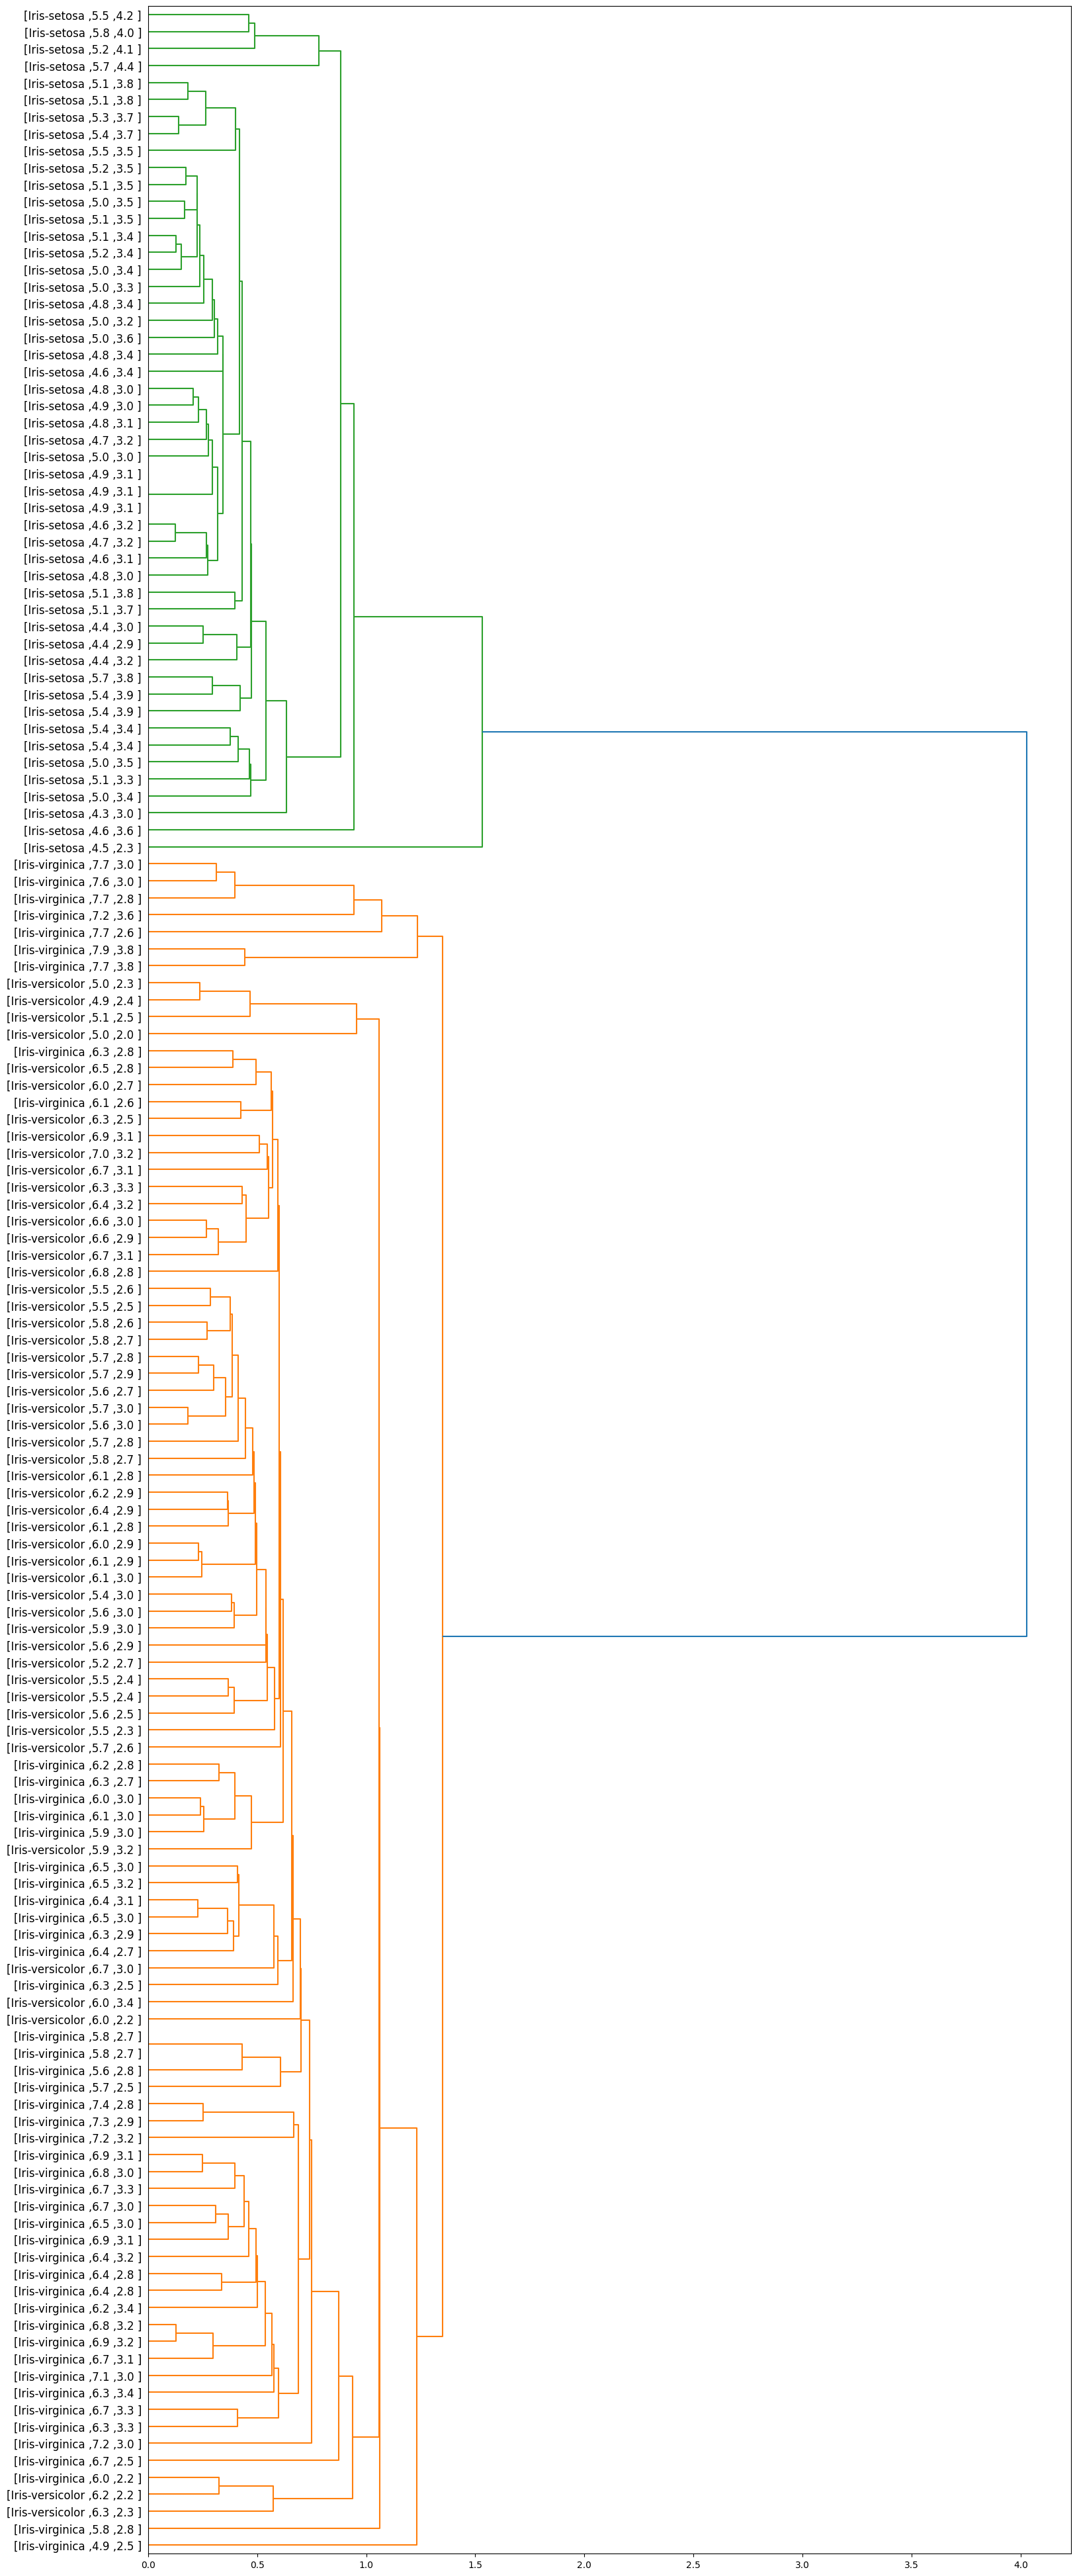

In [18]:
fig=pylab.figure(figsize=(18,50))
def llf(id):
  return '[%s ,%s ,%s ]' %(dataset['class'][id], dataset['sepal-length'][id], dataset['sepal-width'][id])
dendro=hierarchy.dendrogram(E,leaf_label_func=llf,leaf_rotation=0,leaf_font_size=12,orientation='right')

Dendrogram diatas merupakan dendrogram dari single linkage.

> <b>Average Linkage</b>

In [19]:
import pylab
import scipy.cluster.hierarchy
F=hierarchy.linkage(D,'average')

<ipython-input-19-2a31ec84413d>:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  F=hierarchy.linkage(D,'average')


Dilakukan average linkage terhadap data.

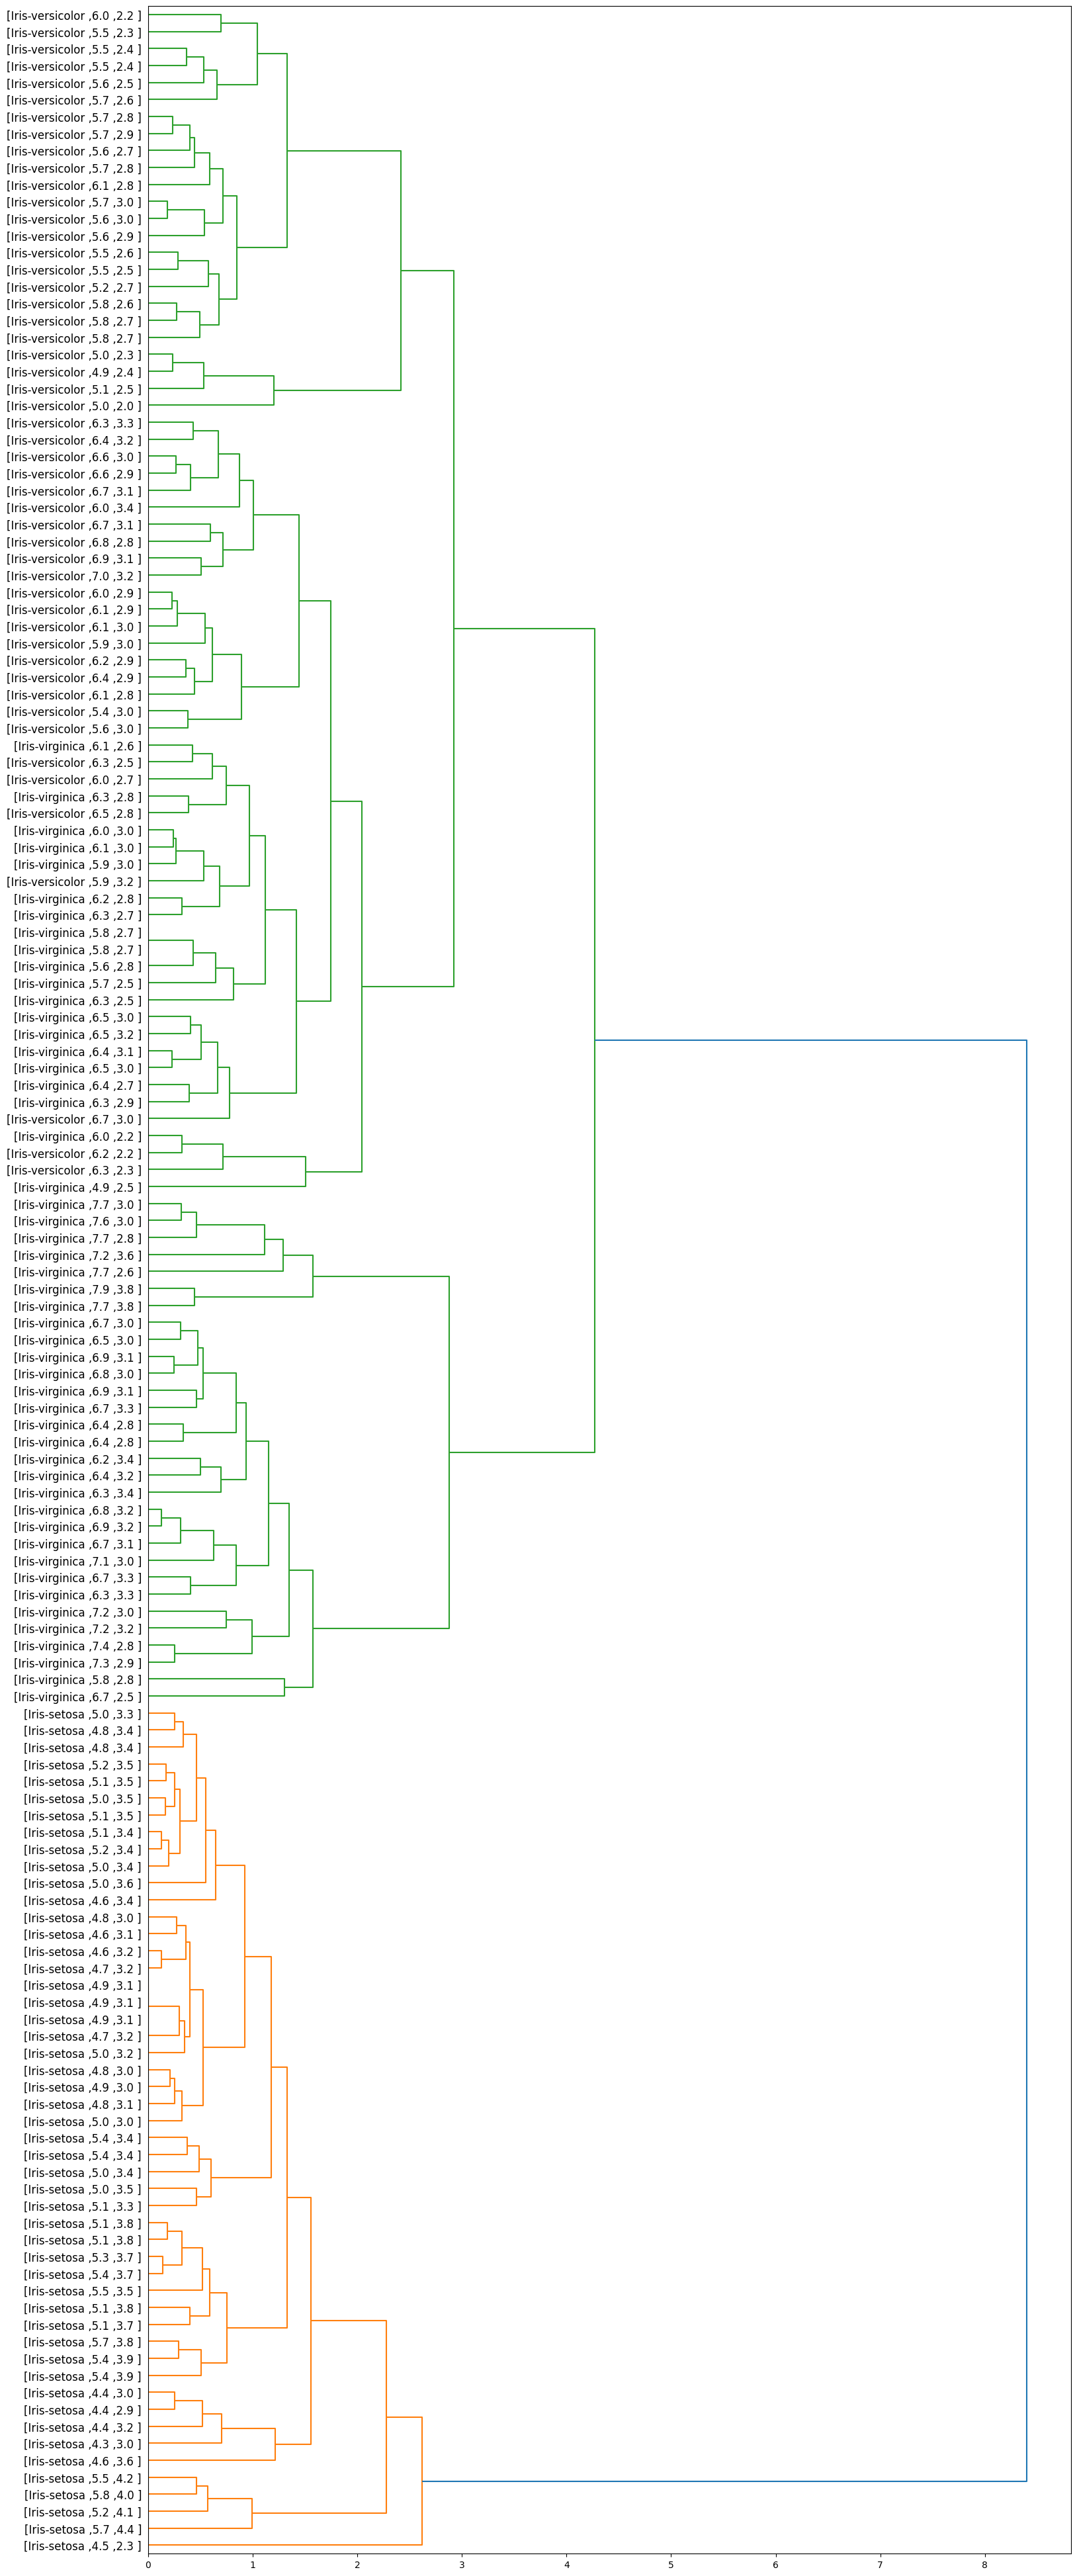

In [20]:
fig=pylab.figure(figsize=(18,50))
def llf(id):
  return '[%s ,%s ,%s ]' %(dataset['class'][id], dataset['sepal-length'][id], dataset['sepal-width'][id])
dendro=hierarchy.dendrogram(F,leaf_label_func=llf,leaf_rotation=0,leaf_font_size=12,orientation='right')

Dendrogram diatas merupakan dendrogram dari average  linkage.

> <b>Complete linkage</b>

In [21]:
import pylab
import scipy.cluster.hierarchy
G=hierarchy.linkage(D,'complete')

<ipython-input-21-18a51ae44c0d>:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  G=hierarchy.linkage(D,'complete')


Dilakukan complete linkage untuk data.

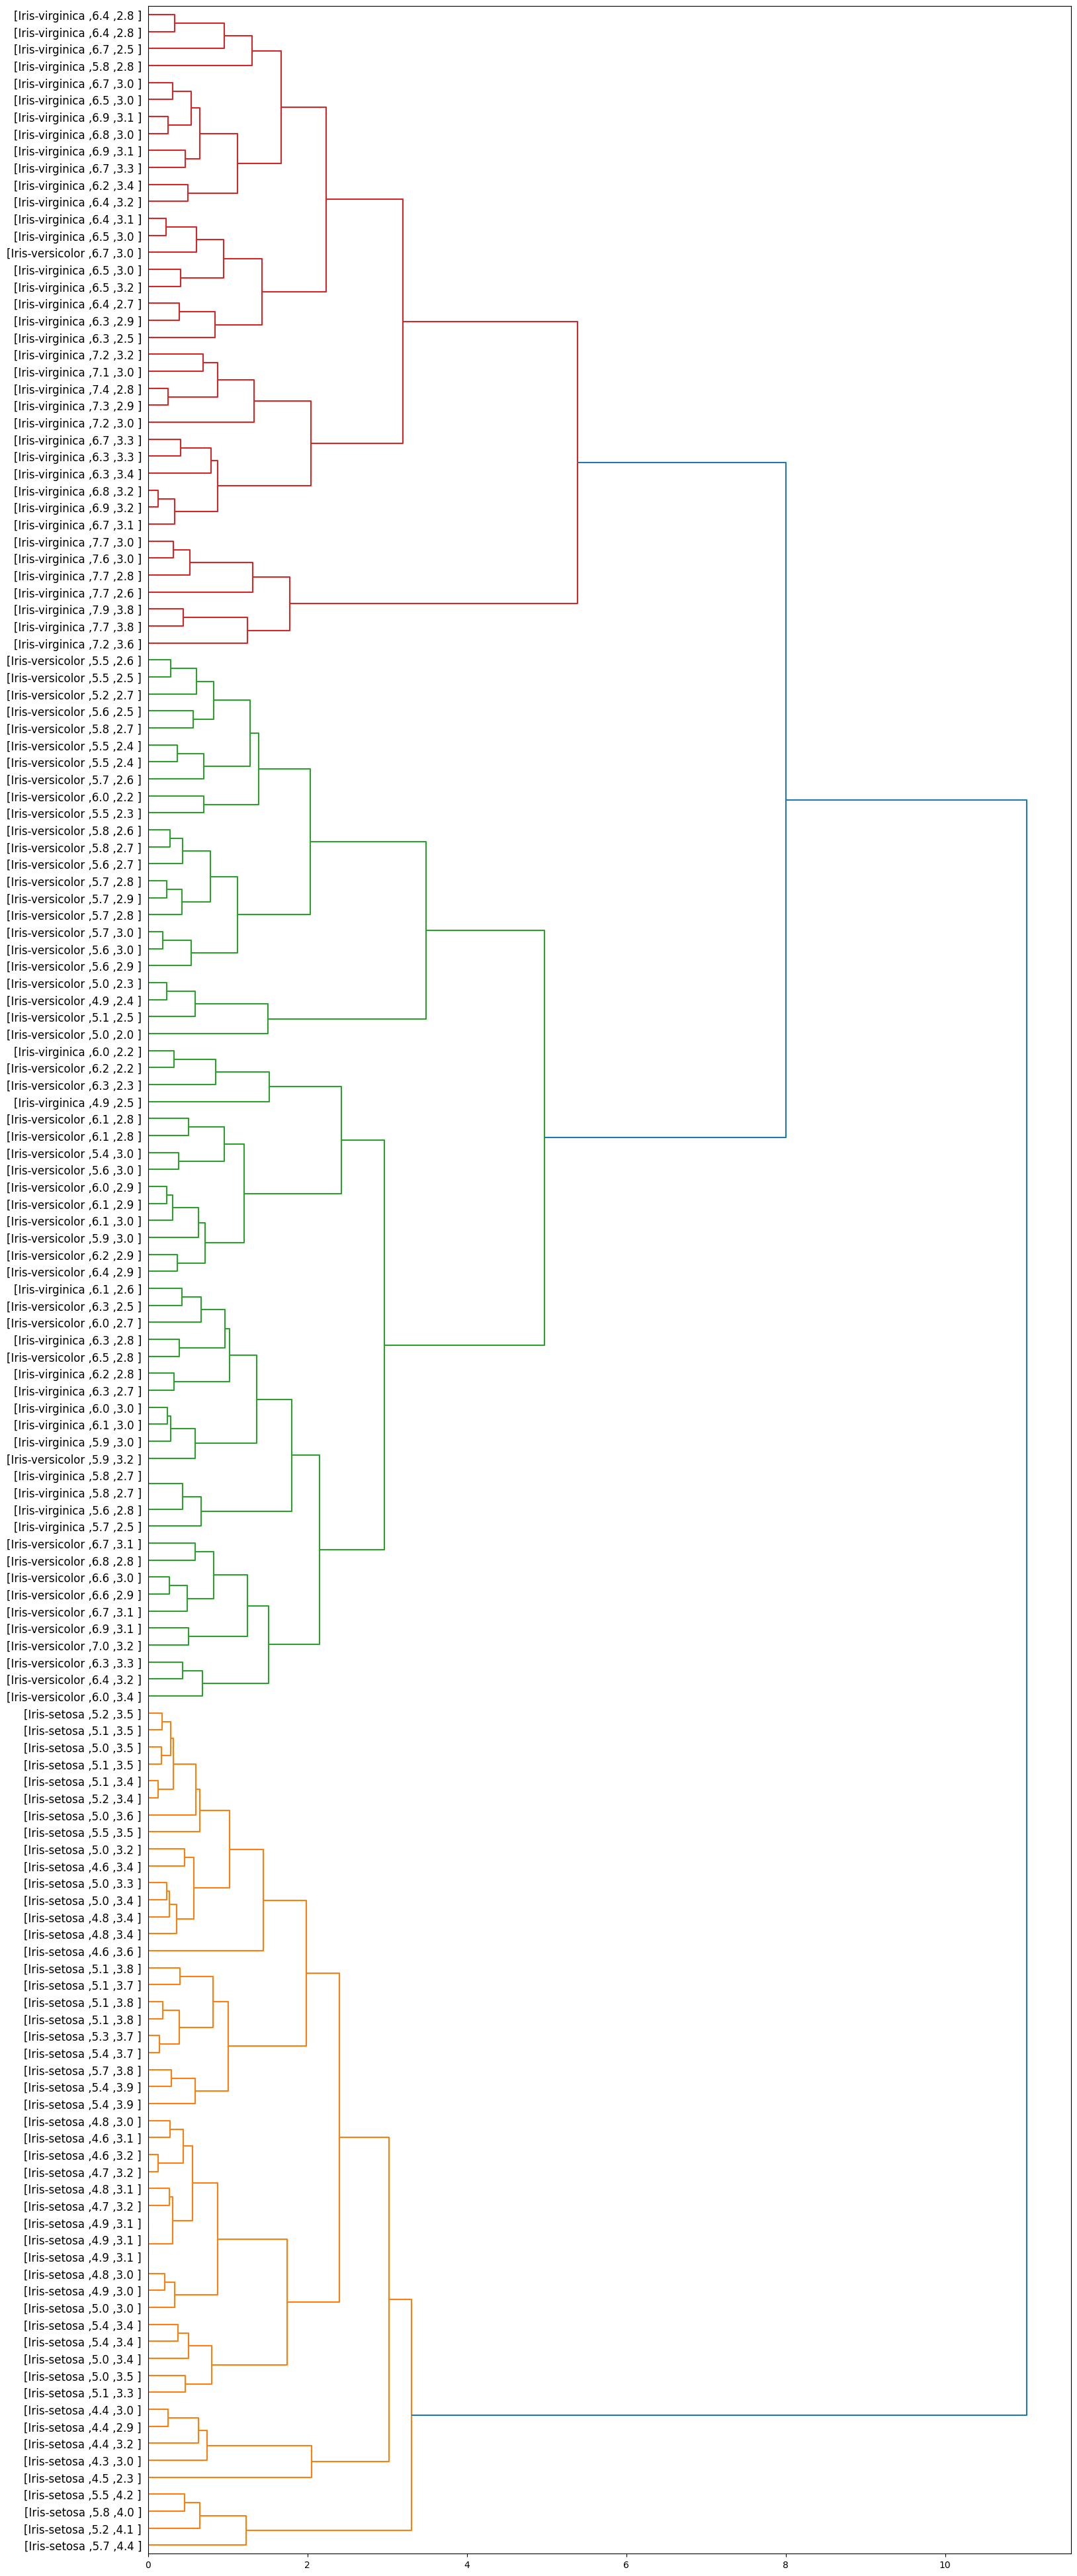

In [22]:
fig=pylab.figure(figsize=(18,50))
def llf(id):
  return '[%s ,%s ,%s ]' %(dataset['class'][id], dataset['sepal-length'][id], dataset['sepal-width'][id])
dendro=hierarchy.dendrogram(G,leaf_label_func=llf,leaf_rotation=0,leaf_font_size=12,orientation='right')

Dendrogram diatas merupakan dendrogram dari complete linkage.

<b>Clustering dengan Scikit-Learn </b>

In [23]:
dist_matrix=distance_matrix(feature_mtx,feature_mtx)
print(dist_matrix)

[[0.         0.21561354 0.16810102 ... 1.08257132 1.14907064 0.96462829]
 [0.21561354 0.         0.10157824 ... 1.08390691 1.17619813 0.95649502]
 [0.16810102 0.10157824 0.         ... 1.12088708 1.19544459 0.98859665]
 ...
 [1.08257132 1.08390691 1.12088708 ... 0.         0.226928   0.18710825]
 [1.14907064 1.17619813 1.19544459 ... 0.226928   0.         0.28409587]
 [0.96462829 0.95649502 0.98859665 ... 0.18710825 0.28409587 0.        ]]


> Single Linkage

In [24]:
agglom=AgglomerativeClustering(n_clusters=3,linkage='single')
agglom.fit(feature_mtx)
agglom.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

 menambahkan field baru ke dataframe untuk menunjukkan cluster setiap baris

In [25]:
dataset['cluster']=agglom.labels_
dataset.head()

sepal-length  sepal-width  petal-length  petal-width        class  cluster
0           5.1          3.5           1.4          0.2  Iris-setosa        2
1           4.9          3.0           1.4          0.2  Iris-setosa        2
2           4.7          3.2           1.3          0.2  Iris-setosa        2
3           4.6          3.1           1.5          0.2  Iris-setosa        2
4           5.0          3.6           1.4          0.2  Iris-setosa        2

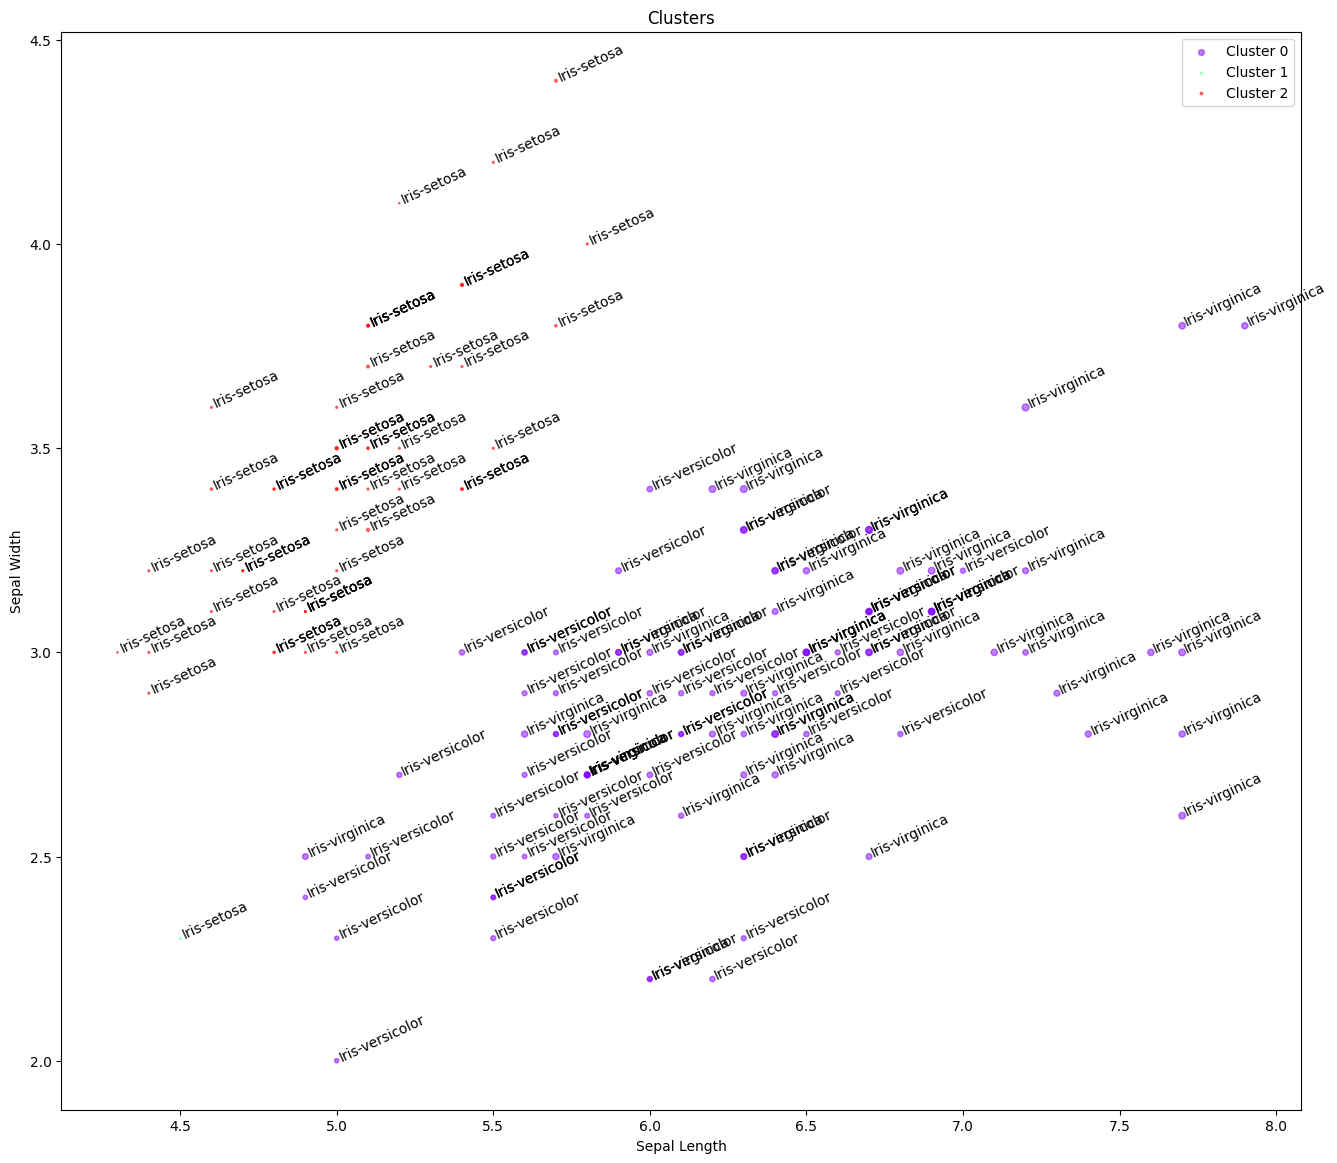

In [30]:
import matplotlib.cm as cm
n_clusters=max(agglom.labels_)+1
colors=cm.rainbow(np.linspace(0,1,n_clusters))
cluster_labels=list(range(0,n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors,cluster_labels):
  # Pilih subset data berdasarkan label klaster
    subset = dataset[dataset['cluster'] == label]

    # Tambahkan label teks untuk setiap data dalam klaster
    for i in subset.index:
        plt.text(
            subset.loc[i, 'sepal-length'],
            subset.loc[i, 'sepal-width'],
            str(subset.loc[i, 'class']),
            rotation=25
        )

    # Scatter plot data untuk klaster ini
    plt.scatter(
        subset['sepal-length'],
        subset['sepal-width'],
        s=subset['petal-width'] * 10,
        c=[color],
        label='Cluster ' + str(label),
        alpha=0.5
    )


plt.legend()
plt.title('Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Tampilkan plot
plt.show()


Menghitung jumlah di setiap kelompok

In [31]:
dataset.groupby(['cluster'])['cluster'].count()

cluster
0    100
1      1
2     49
Name: cluster, dtype: int64

Melihat karakteristik masing-masing cluster

In [33]:
agg_iris=dataset.groupby(['cluster'])[['sepal-length','sepal-width','petal-length','petal-width']].mean()
agg_iris

sepal-length  sepal-width  petal-length  petal-width
cluster                                                      
0            6.262000     2.872000      4.906000     1.676000
1            4.500000     2.300000      1.300000     0.300000
2            5.016327     3.440816      1.467347     0.242857

Plotting dendogram single linkage

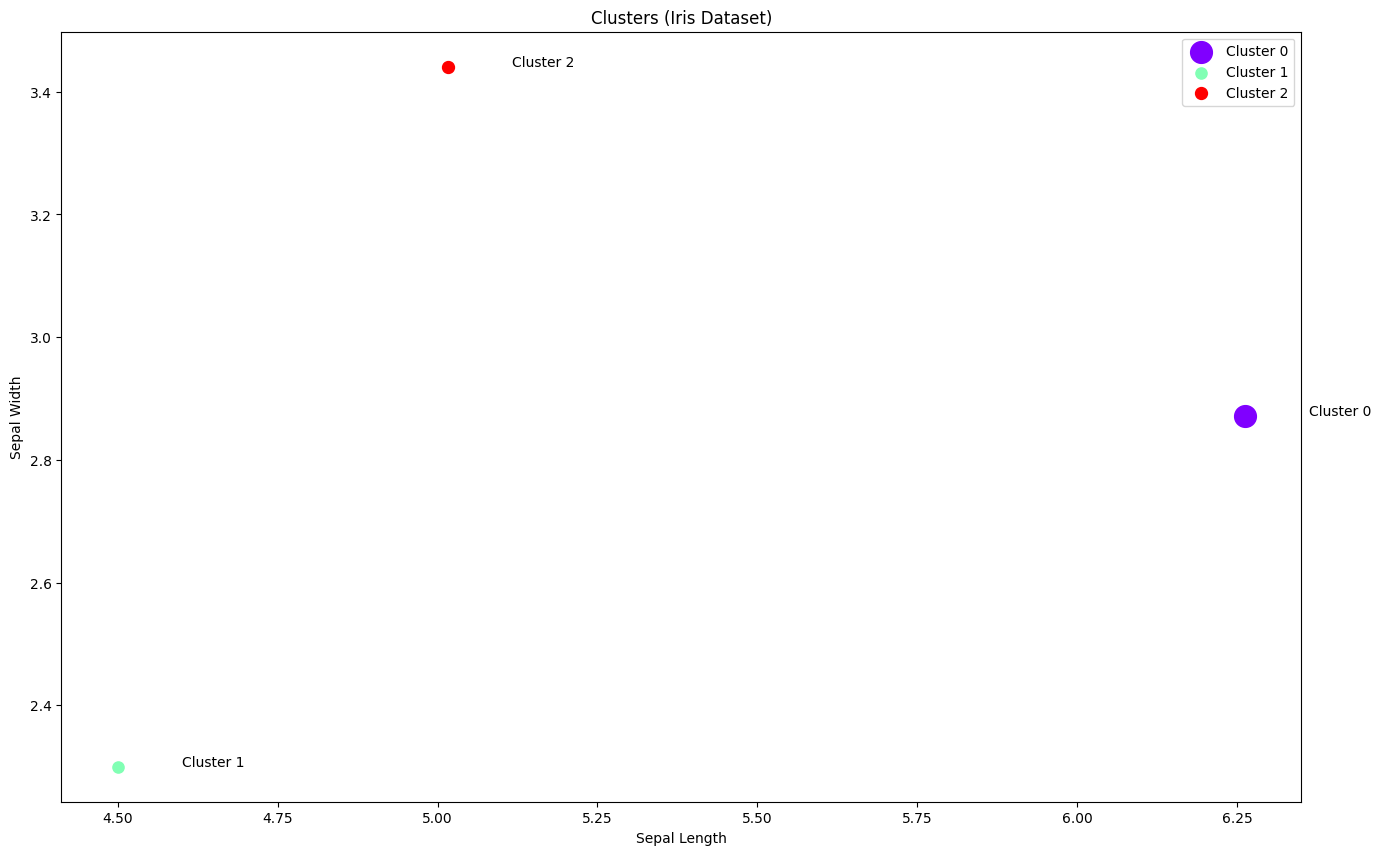

In [34]:

# Plot cluster
plt.figure(figsize=(16, 10))

for color, label in zip(colors, cluster_labels):
    subset = agg_iris.loc[[label]]  # Pilih data berdasarkan label cluster
    for i in subset.index:
        plt.text(
            subset.loc[i, 'sepal-length'] + 0.1,  # Sedikit geser posisi teks
            subset.loc[i, 'sepal-width'],         # Koordinat Y
            f"Cluster {int(i)}"  # Tambahkan teks label cluster
        )
    plt.scatter(
        subset['sepal-length'],         # Koordinat X
        subset['sepal-width'],          # Koordinat Y
        s=subset['petal-length'] * 50,  # Ukuran titik berdasarkan petal-length
        c=[color],                      # Warna titik
        label=f"Cluster {int(label)}"
    )

plt.legend()
plt.title('Clusters (Iris Dataset)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


berikut merupakan hasil plotting dendrogram berdasarkan karakteristik dari masing-masing cluster.

> Average Linkage

In [35]:
agglom1=AgglomerativeClustering(n_clusters=3,linkage='average')
agglom1.fit(feature_mtx)
agglom1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

label cluster dari setiap data jika menggunakan average linkage.

In [36]:
dataset['cluster']=agglom1.labels_
dataset.head()

sepal-length  sepal-width  petal-length  petal-width        class  cluster
0           5.1          3.5           1.4          0.2  Iris-setosa        0
1           4.9          3.0           1.4          0.2  Iris-setosa        0
2           4.7          3.2           1.3          0.2  Iris-setosa        0
3           4.6          3.1           1.5          0.2  Iris-setosa        0
4           5.0          3.6           1.4          0.2  Iris-setosa        0

penambahan kolom cluster yang berisi cluster dari setiap data.

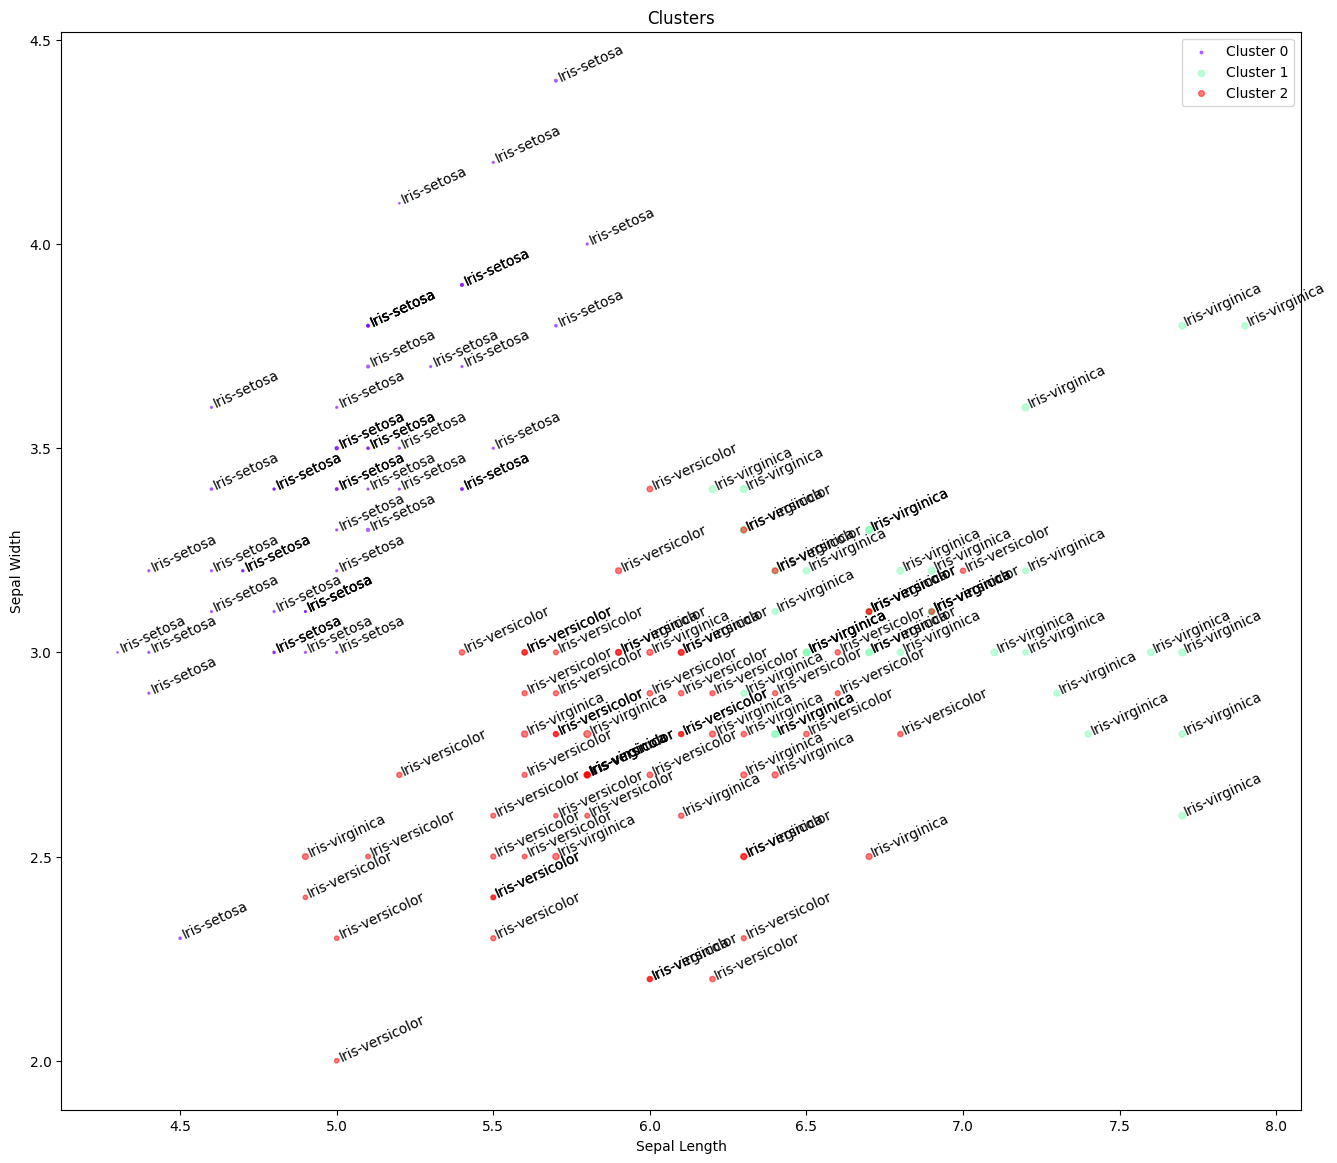

In [45]:
import matplotlib.cm as cm
n_clusters=max(agglom1.labels_)+1
colors=cm.rainbow(np.linspace(0,1,n_clusters))
cluster_labels=list(range(0,n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors,cluster_labels):
  # Pilih subset data berdasarkan label klaster
    subset = dataset[dataset['cluster'] == label]

    # Tambahkan label teks untuk setiap data dalam klaster
    for i in subset.index:
        plt.text(
            subset.loc[i, 'sepal-length'],
            subset.loc[i, 'sepal-width'],
            str(subset.loc[i, 'class']),
            rotation=25
        )

    # Scatter plot data untuk klaster ini
    plt.scatter(
        subset['sepal-length'],
        subset['sepal-width'],
        s=subset['petal-width'] * 10,
        c=[color],
        label='Cluster ' + str(label),
        alpha=0.5
    )


plt.legend()
plt.title('Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Tampilkan plot
plt.show()


persebaran data beserta warna clusternya berdasarkan average linkage.

Melihat jumlah data di setiap cluster dan mean dari lebar dan tinggi sepal serta lebar dan tinggi petal dari setiap cluster.

In [46]:
dataset.groupby(['cluster'])['cluster'].count()


cluster
0    50
1    34
2    66
Name: cluster, dtype: int64

In [47]:
agg1_iris=dataset.groupby(['cluster'])[['sepal-length','sepal-width','petal-length','petal-width']].mean()
agg1_iris

sepal-length  sepal-width  petal-length  petal-width
cluster                                                      
0            5.006000     3.418000      1.464000     0.244000
1            6.888235     3.114706      5.782353     2.120588
2            5.939394     2.746970      4.454545     1.446970

plotting dendrogram

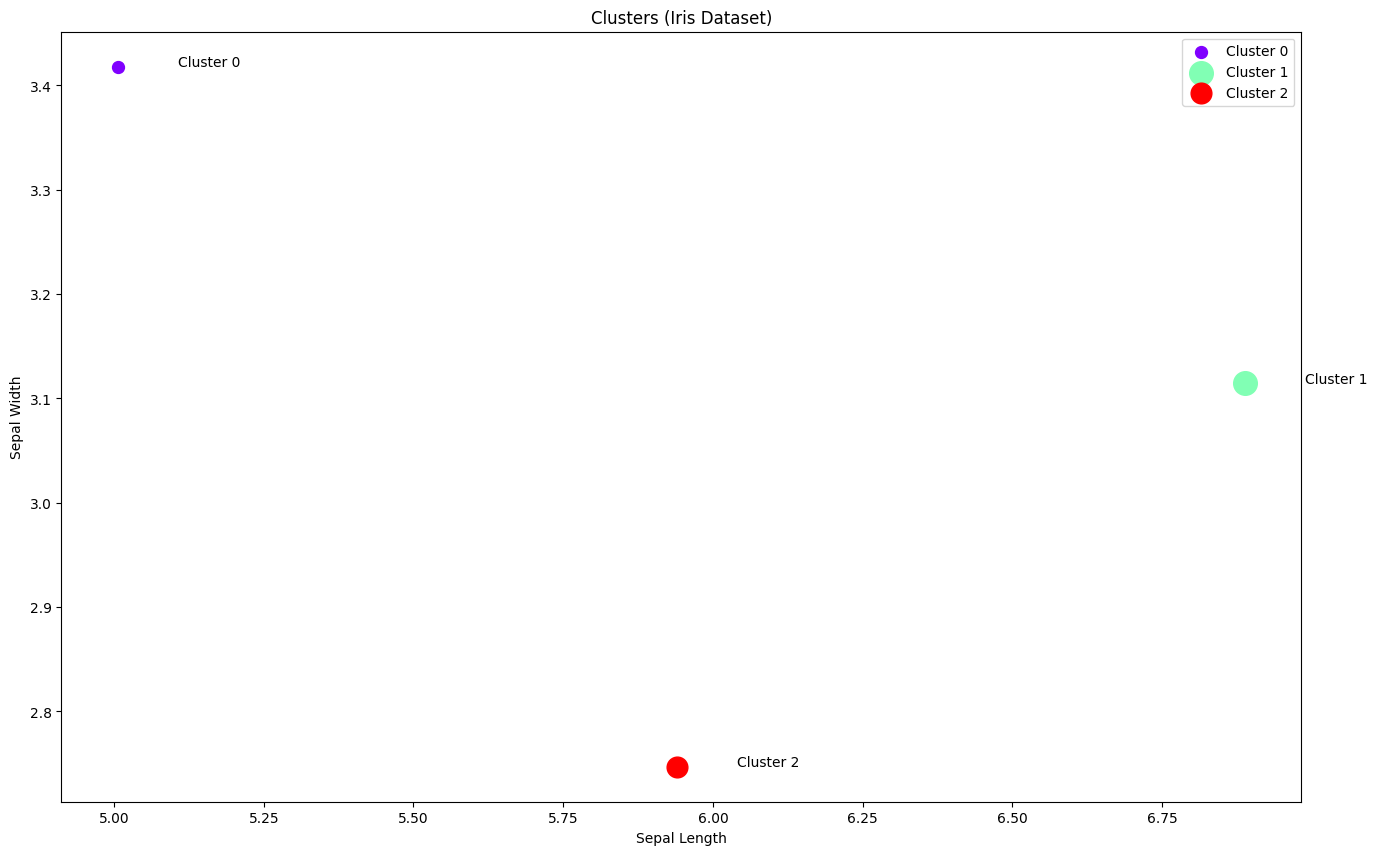

In [48]:

# Plot cluster
plt.figure(figsize=(16, 10))

for color, label in zip(colors, cluster_labels):
    subset = agg1_iris.loc[[label]]  # Pilih data berdasarkan label cluster
    for i in subset.index:
        plt.text(
            subset.loc[i, 'sepal-length'] + 0.1,  # Sedikit geser posisi teks
            subset.loc[i, 'sepal-width'],         # Koordinat Y
            f"Cluster {int(i)}"  # Tambahkan teks label cluster
        )
    plt.scatter(
        subset['sepal-length'],         # Koordinat X
        subset['sepal-width'],          # Koordinat Y
        s=subset['petal-length'] * 50,  # Ukuran titik berdasarkan petal-length
        c=[color],                      # Warna titik
        label=f"Cluster {int(label)}"
    )

plt.legend()
plt.title('Clusters (Iris Dataset)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


berikut merupakan plotting cluster dengan menggunakan average linkage.

>Complete Linkage

In [52]:
agglom2=AgglomerativeClustering(n_clusters=3,linkage='complete')
agglom2.fit(feature_mtx)
agglom2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

label cluster dari setiap data jika menggunakan complete linkage.

In [53]:
dataset['cluster']=agglom2.labels_
dataset.head()

sepal-length  sepal-width  petal-length  petal-width        class  cluster
0           5.1          3.5           1.4          0.2  Iris-setosa        0
1           4.9          3.0           1.4          0.2  Iris-setosa        0
2           4.7          3.2           1.3          0.2  Iris-setosa        0
3           4.6          3.1           1.5          0.2  Iris-setosa        0
4           5.0          3.6           1.4          0.2  Iris-setosa        0

penambahan colom cluster.

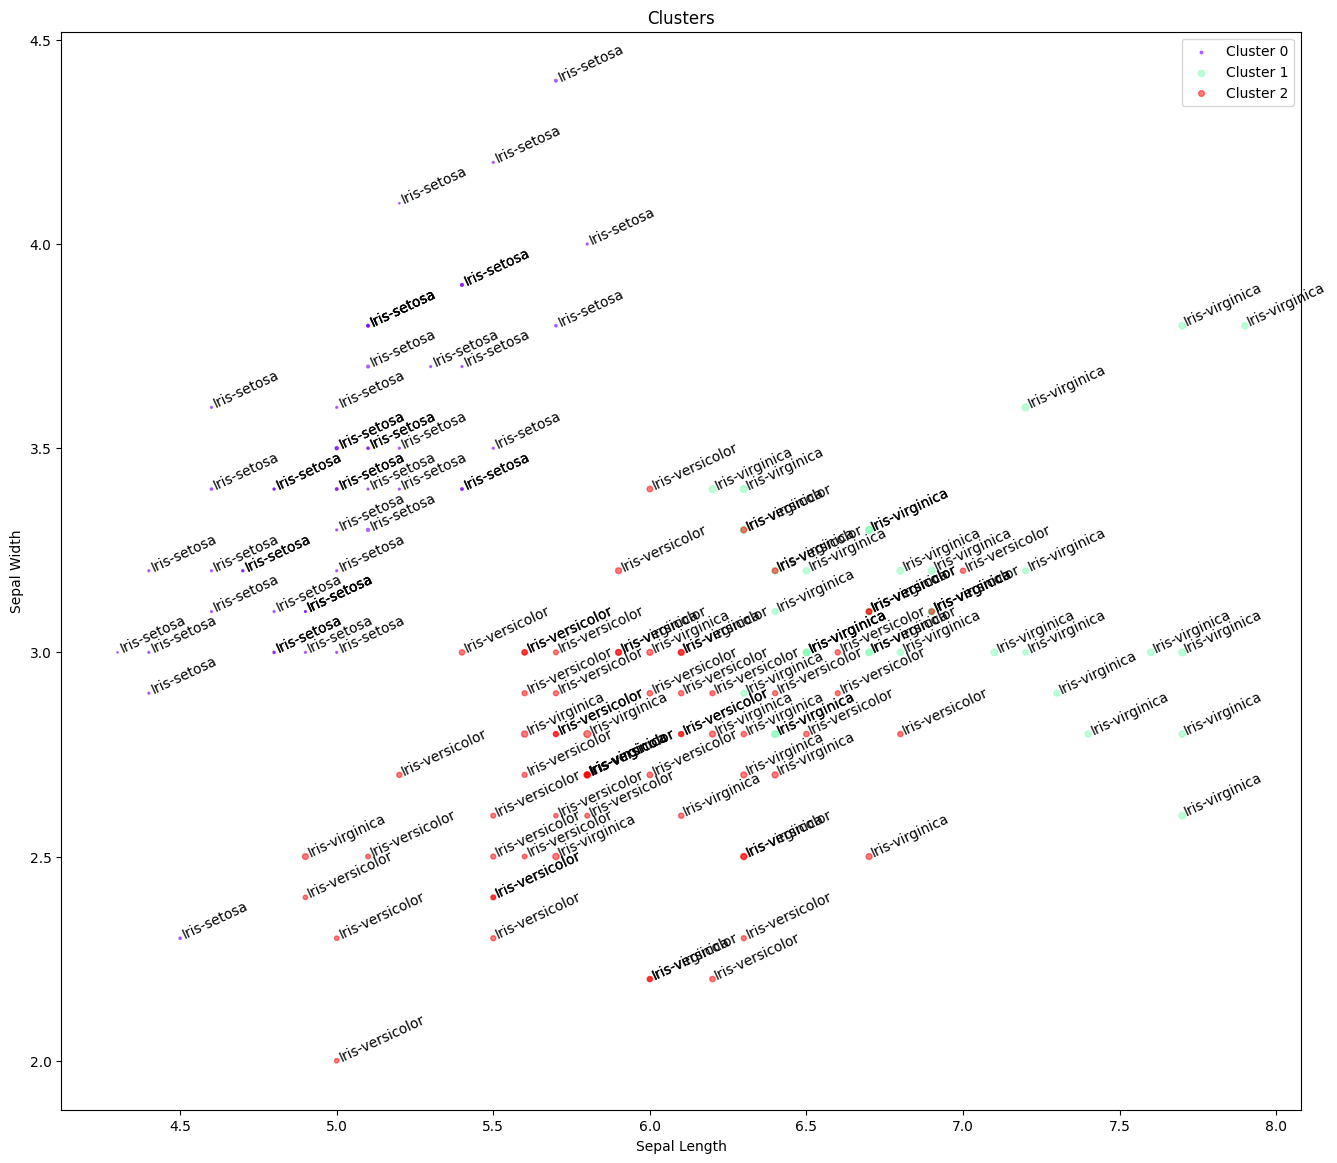

In [57]:
import matplotlib.cm as cm
n_clusters=max(agglom2.labels_)+1
colors=cm.rainbow(np.linspace(0,1,n_clusters))
cluster_labels=list(range(0,n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors,cluster_labels):
  # Pilih subset data berdasarkan label klaster
    subset = dataset[dataset['cluster'] == label]

    # Tambahkan label teks untuk setiap data dalam klaster
    for i in subset.index:
        plt.text(
            subset.loc[i, 'sepal-length'],
            subset.loc[i, 'sepal-width'],
            str(subset.loc[i, 'class']),
            rotation=25
        )

    # Scatter plot data untuk klaster ini
    plt.scatter(
        subset['sepal-length'],
        subset['sepal-width'],
        s=subset['petal-width'] * 10,
        c=[color],
        label='Cluster ' + str(label),
        alpha=0.5
    )


plt.legend()
plt.title('Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Tampilkan plot
plt.show()


persebaran data beserta clusternya berdasarkan complete linkage.

In [58]:
dataset.groupby(['cluster'])['cluster'].count()

cluster
0    50
1    34
2    66
Name: cluster, dtype: int64

jumlah data di setiap cluster.

In [59]:
agg2_iris=dataset.groupby(['cluster'])[['sepal-length','sepal-width','petal-length','petal-width']].mean()
agg2_iris

sepal-length  sepal-width  petal-length  petal-width
cluster                                                      
0            5.006000     3.418000      1.464000     0.244000
1            6.888235     3.114706      5.782353     2.120588
2            5.939394     2.746970      4.454545     1.446970

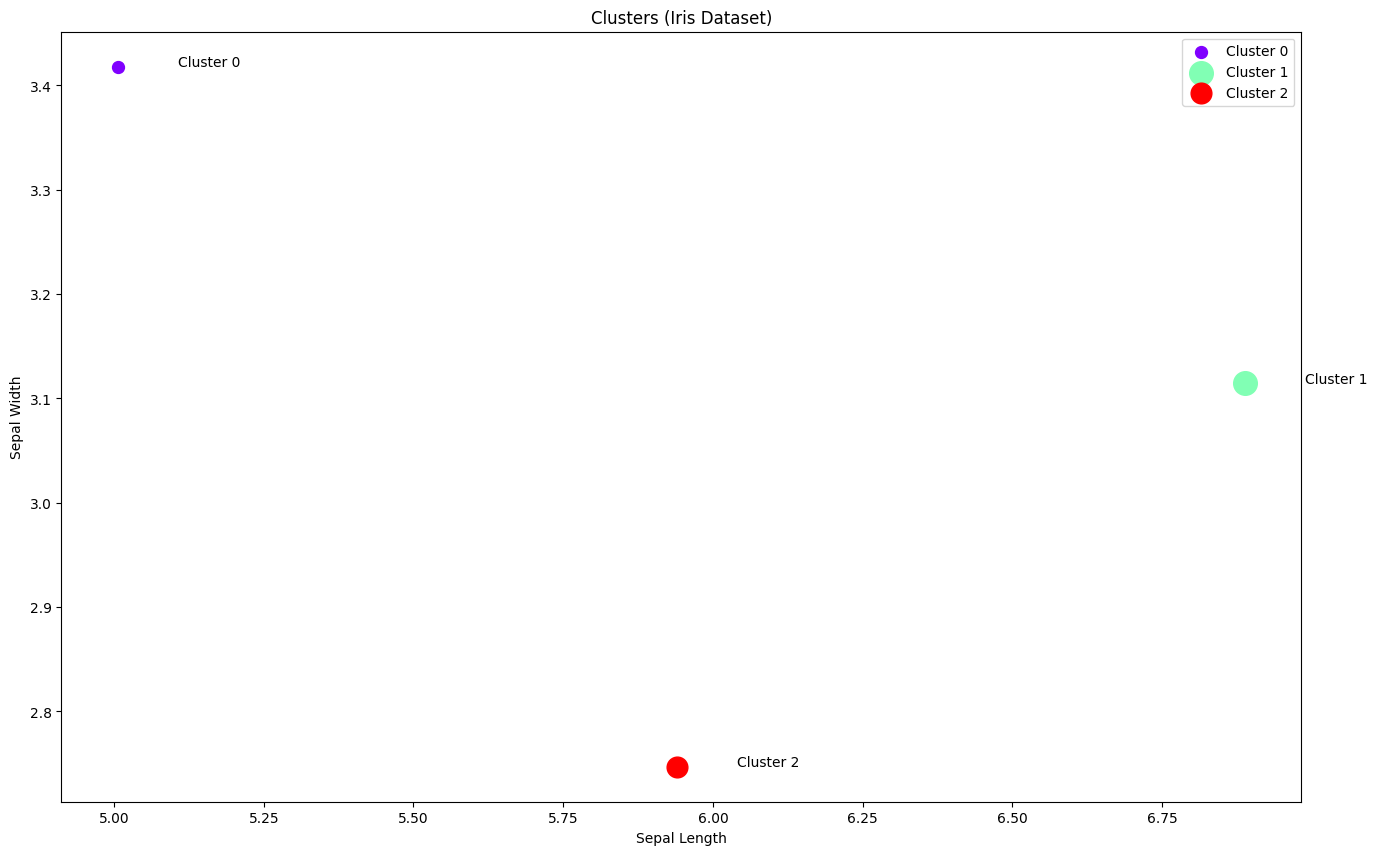

In [60]:

# Plot cluster
plt.figure(figsize=(16, 10))

for color, label in zip(colors, cluster_labels):
    subset = agg2_iris.loc[[label]]  # Pilih data berdasarkan label cluster
    for i in subset.index:
        plt.text(
            subset.loc[i, 'sepal-length'] + 0.1,  # Sedikit geser posisi teks
            subset.loc[i, 'sepal-width'],         # Koordinat Y
            f"Cluster {int(i)}"  # Tambahkan teks label cluster
        )
    plt.scatter(
        subset['sepal-length'],         # Koordinat X
        subset['sepal-width'],          # Koordinat Y
        s=subset['petal-length'] * 50,  # Ukuran titik berdasarkan petal-length
        c=[color],                      # Warna titik
        label=f"Cluster {int(label)}"
    )

plt.legend()
plt.title('Clusters (Iris Dataset)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


plotting dendogram.

Perbedaan clustering single linkage dan average linkage dengan menggunakan scipy dan scikit learn yaitu clustering dengan menggunakan scipy tidak memberikan detail pengelompokan cluster dengan menggunakan fitur, sementara scikit learn menggunakan detail pengelompokan cluster berdasarkan nilai rata2 fitur di setiap cluster.<br>

Output dari scipy yaitu matriks linkage atau dendrogram, sedangkan output dari scikit learn yaitu label cluster langsung. <br>

Ternyata complete dan average linkage dengan menggunakan scikit-learn menghasilkan hasil yang sama.<br>

Untuk data set ini sebaiknya menggunakan scikit-learn karena hasil plotting dendrogram lebih mudah untuk dibaca. <br>

Perbedaan pada single linkage yaitu hasil dengan scipy dapat divisualisasikan dengan baik, sedangkan hasil dengan scikit-learn dapat langsung menghasilkan label klaster untuk setiap data. <br>

Perbedaan pada average linkage yaitu dengan scipy, dendrogram menunjukkan penggabungan cluster lebih halus, sedangkan dengan scikit-learn, hasil pengelompokan lebih fokus pada cluster yang merata. <br>

Perbedaan pada complete linkage yaitu scipy dapat membentuk cluster yang lebih kompak, sedangkan scikit learn dapat langsung memberikan label cluster untuk setiap data.